## DX799S O1 Data Science Capstone (Summer 1 2025): ACTIVITY 2.2 ##

Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone One, create a Jupyter Notebook (similar to in Module B, semester two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data, using the methods you have learned about in this course and in this program, and draw interesting conclusions. 

For Week 2, include concepts such as linear regression with lasso, ridge, and elastic net regression. This homework will be submitted for peer review and feedback in Week 3 in the assignment titled 3.4 Peer Review: Week 2 Jupyter Notebook. Complete your Jupyter Notebook homework by 11:59 pm ET on Sunday.

In Week 7, you will compile your findings from your Jupyter Notebook homework into your Milestone One assignment for grading. For full instructions and the rubric for Milestone One, refer to the following link. 

In [3]:
# ===================================
# Useful Imports: Add more as needed
# ===================================

# Standard Libraries
import os
import time
import math
import io
import zipfile
import requests
from urllib.parse import urlparse
from itertools import chain, combinations

# Data Science Libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker  # Optional: Format y-axis labels as dollars
import seaborn as sns

# Scikit-learn (Machine Learning)
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    RandomizedSearchCV, 
    RepeatedKFold
)
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector, f_regression, SelectKBest
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet



In [5]:
df_videoreview = pd.read_csv("video_review.csv")

In [ ]:
# regress primary impact type

In [7]:
df_injuryrecord = pd.read_csv("InjuryRecord.csv")

In [ ]:
# regress on surface type

In [ ]:
# regress on play type

In [53]:
X = df.drop('taxvaluedollarcnt', axis=1)  
y = df['taxvaluedollarcnt']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### Part 1: Baseline Modeling [3 pts]

Apply the following regression models to the scaled training dataset using **default parameters**:

- Ridge Regression
- Lasso Regression
- Elastic Net Regression

For each model:
- Use **repeated cross-validation** (e.g., 5 folds, 5 repeats).
- Report the **mean and standard deviation of CV RMSE Score** across all folds in a table. 


In [4]:
# Add as many code cells as you need
repeated_cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

In [5]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_train, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')

mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Linear Regression: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Linear Regression: ${std_rmse:,.2f}')

Mean CV RMSE for Linear Regression: $476,342.01
Standard Deviation CV RMSE for Linear Regression: $23,842.12


In [6]:
#Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

ridge = Ridge()

neg_mse_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Ridge Regression: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Ridge Regression: ${std_rmse:,.2f}')

Mean CV RMSE for Ridge Regression: $476,316.76
Standard Deviation CV RMSE for Ridge Regression: $23,825.86


In [7]:
#Lasso Regression 

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

lasso = Lasso(alpha=1.0, max_iter=10000)

neg_mse_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Lasso Regression: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Lasso Regression: ${std_rmse:,.2f}')

Mean CV RMSE for Lasso Regression: $476,340.63
Standard Deviation CV RMSE for Lasso Regression: $23,841.21


In [8]:
#Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

dt = DecisionTreeRegressor()

neg_mse_scores = cross_val_score(dt, X_train_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Decision Tree: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Decision Tree: ${std_rmse:,.2f}')

Mean CV RMSE for Decision Tree: $611,537.00
Standard Deviation CV RMSE for Decision Tree: $30,202.83


In [11]:
#Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

br = BaggingRegressor()

neg_mse_scores = cross_val_score(br, X_train_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores
rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Bagging Regressor : ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Bagging Regressor: ${std_rmse:,.2f}')

Mean CV RMSE for Bagging Regressor : $462,458.49
Standard Deviation CV RMSE for Bagging Regressor: $20,578.82


In [12]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

random_forest = RandomForestRegressor(random_state=42)

neg_mse_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores
rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Random Forest : ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Random Forest: ${std_rmse:,.2f}')

Mean CV RMSE for Random Forest : $445,518.13
Standard Deviation CV RMSE for Random Forest: $20,297.68


In [13]:
#Gradient Boosting Trees
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

gradient = GradientBoostingRegressor(random_state=42)

neg_mse_scores = cross_val_score(gradient, X_train_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores
rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Gradient Boosting Trees: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Gradient Boosting Trees: ${std_rmse:,.2f}')

Mean CV RMSE for Gradient Boosting Trees: $450,327.77
Standard Deviation CV RMSE for Gradient Boosting Trees: $22,309.71


### Part 1: Discussion [2 pts]

In a paragraph or well-organized set of bullet points, briefly compare and discuss:

  - Which models perform best overall?
  - Which are most stable (lowest std)?
  - Any signs of overfitting or underfitting?

To determine which model performed best, we looked at Mean RMSE of each model; the lower this value, the better the model performed. Therefore, according to our results, Random Forest Regressor (Mean RMSE: $445,518.13) was the best model in part 1. However, even though we are working with large numbers, this score is still a very large and is concerning in terms of our model's accuracy in predicting the target value. When looking at which model is the most stable (or has the lowest std), we see the Random Forest Regressor is again the best option. This model has a STD of $20,297.68 which indictates it fits the data the most consistently (compared to the other models) and there are not major outliers effecting the performance of the model. Based on the results, we would say the Decision Tree Regression model is overfitting the data. The model resulted in a large Mean RMSE value and a high standard STD which signifies it may not be capturing the complexity of the training data and will mostly likely not generalize well to unseen data. Decision trees are prone to overfitting, so this is not that surprising of a result.


### Part 2: Feature Engineering [3 pts]

Consider **at least three new features** based on your Milestone 1, Part 5. Examples include:
- Polynomial terms
- Log or interaction terms
- Groupings or transformations of categorical features

Add these features to `X_train` and then:
- Scale using `StandardScaler` 
- Re-run all models listed above (using default settings again).
- Report updated RMSE scores (mean and std) across repeated CV in a table. 

**Note:**  Recall that this will require creating a new version of the dataset, so effectively you may be running "polynomial regression" using `LinearRegression`. 

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_poly = X_train[['calculatedfinishedsquarefeet']]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly.fit_transform(X_poly)
poly_df = pd.DataFrame(X_poly_transformed, columns=poly.get_feature_names_out(['calculatedfinishedsquarefeet']))
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(poly_df)

In [12]:
#Linear Regression with Polynomial


lr = LinearRegression()

neg_mse_scores_lr = cross_val_score(lr, X_poly_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_lr = -neg_mse_scores_lr  
rmse_scores_lr = np.sqrt(mse_scores_lr)  

mean_rmse_lr = np.mean(rmse_scores_lr)
std_rmse_lr = np.std(rmse_scores_lr)

print(f'Mean CV RMSE for Linear Regression : ${mean_rmse_lr:,.2f}')
print(f'Standard Deviation CV RMSE for Linear Regression: ${std_rmse_lr:,.2f}')


Mean CV RMSE for Linear Regression : $533,234.14
Standard Deviation CV RMSE for Linear Regression: $77,441.44


In [13]:
#Ridge Regression with Polynomial


ridge = Ridge()

neg_mse_scores_ridge = cross_val_score(ridge, X_poly_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_ridge = -neg_mse_scores_ridge
rmse_scores_ridge = np.sqrt(mse_scores_ridge)

mean_rmse_ridge = np.mean(rmse_scores_ridge)
std_rmse_ridge = np.std(rmse_scores_ridge)

print(f'Mean CV RMSE for Ridge Regression : ${mean_rmse_ridge:,.2f}')
print(f'Standard Deviation CV RMSE for Ridge Regression: ${std_rmse_ridge:,.2f}')


Mean CV RMSE for Ridge Regression : $533,226.08
Standard Deviation CV RMSE for Ridge Regression: $77,426.41


In [14]:
# Lasso with Polynomial

lasso = Lasso()

neg_mse_scores_lasso = cross_val_score(lasso, X_poly_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_lasso = -neg_mse_scores_lasso
rmse_scores_lasso = np.sqrt(mse_scores_lasso)

mean_rmse_lasso = np.mean(rmse_scores_lasso)
std_rmse_lasso = np.std(rmse_scores_lasso)

print(f'Mean CV RMSE for Lasso Regression : ${mean_rmse_lasso:,.2f}')
print(f'Standard Deviation CV RMSE for Lasso Regression: ${std_rmse_lasso:,.2f}')


Mean CV RMSE for Lasso Regression : $533,232.10
Standard Deviation CV RMSE for Lasso Regression: $77,437.00


In [15]:
#Decision Tree with Polynomial

dt = DecisionTreeRegressor()

neg_mse_scores_dt = cross_val_score(dt, X_poly_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_dt = -neg_mse_scores_dt
rmse_scores_dt = np.sqrt(mse_scores_dt)

mean_rmse_dt = np.mean(rmse_scores_dt)
std_rmse_dt = np.std(rmse_scores_dt)

print(f'Mean CV RMSE for Decision Tree Regression : ${mean_rmse_dt:,.2f}')
print(f'Standard Deviation CV RMSE for Decision Tree Regression: ${std_rmse_dt:,.2f}')


Mean CV RMSE for Decision Tree Regression : $578,009.51
Standard Deviation CV RMSE for Decision Tree Regression: $19,557.84


In [17]:
# Bagging with Polynomial


bagging = BaggingRegressor()

neg_mse_scores_bagging = cross_val_score(bagging, X_poly_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_bagging = -neg_mse_scores_bagging
rmse_scores_bagging = np.sqrt(mse_scores_bagging)

mean_rmse_bagging = np.mean(rmse_scores_bagging)
std_rmse_bagging = np.std(rmse_scores_bagging)

print(f'Mean CV RMSE for Bagging Regressor : ${mean_rmse_bagging:,.2f}')
print(f'Standard Deviation CV RMSE for Bagging Regressor: ${std_rmse_bagging:,.2f}')


Mean CV RMSE for Bagging Regressor : $541,186.01
Standard Deviation CV RMSE for Bagging Regressor: $15,907.19


In [18]:
# Random Forest with Polynomial
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

random_forest = RandomForestRegressor(random_state=42)

neg_mse_scores_rf = cross_val_score(random_forest, X_poly_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_rf = -neg_mse_scores_rf
rmse_scores_rf = np.sqrt(mse_scores_rf)

mean_rmse_rf = np.mean(rmse_scores_rf)
std_rmse_rf = np.std(rmse_scores_rf)

print(f'Mean CV RMSE for Random Forest Regressor : ${mean_rmse_rf:,.2f}')
print(f'Standard Deviation CV RMSE for Random Forest Regressor: ${std_rmse_rf:,.2f}')


Mean CV RMSE for Random Forest Regressor : $534,977.35
Standard Deviation CV RMSE for Random Forest Regressor: $17,388.05


In [19]:
# Gradient Boosting with Polynomial

gradient_boosting = GradientBoostingRegressor()

neg_mse_scores_gb = cross_val_score(gradient_boosting, X_poly_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_gb = -neg_mse_scores_gb
rmse_scores_gb = np.sqrt(mse_scores_gb)

mean_rmse_gb = np.mean(rmse_scores_gb)
std_rmse_gb = np.std(rmse_scores_gb)

print(f'Mean CV RMSE for Gradient Boosting Regressor : ${mean_rmse_gb:,.2f}')
print(f'Standard Deviation CV RMSE for Gradient Boosting Regressor: ${std_rmse_gb:,.2f}')


Mean CV RMSE for Gradient Boosting Regressor : $491,682.41
Standard Deviation CV RMSE for Gradient Boosting Regressor: $21,612.18


In [23]:
# Log transform the 'YearBuilt' feature 

X_train['log_yearbuilt'] = np.log(X_train['yearbuilt'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)



In [24]:
#Linear Regression with Log Transform yearbuilt 

linear = LinearRegression()
neg_mse_scores_lr = cross_val_score(linear, X_train, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_lr = -neg_mse_scores_lr
rmse_scores_lr = np.sqrt(mse_scores_lr)

mean_rmse_lr = np.mean(rmse_scores_lr)
std_rmse_lr = np.std(rmse_scores_lr)

print(f'Mean CV RMSE for Linear Regression : ${mean_rmse_lr:,.2f}')
print(f'Standard Deviation CV RMSE for Linear Regression: ${std_rmse_lr:,.2f}')


Mean CV RMSE for Linear Regression : $476,037.12
Standard Deviation CV RMSE for Linear Regression: $23,762.10


In [25]:
# Ridge Regression with Log Transform yearbuilt

ridge = Ridge()
neg_mse_scores_ridge = cross_val_score(ridge, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_ridge = -neg_mse_scores_ridge
rmse_scores_ridge = np.sqrt(mse_scores_ridge)

mean_rmse_ridge = np.mean(rmse_scores_ridge)
std_rmse_ridge = np.std(rmse_scores_ridge)

print(f'Mean CV RMSE for Ridge Regression : ${mean_rmse_ridge:,.2f}')
print(f'Standard Deviation CV RMSE for Ridge Regression: ${std_rmse_ridge:,.2f}')


Mean CV RMSE for Ridge Regression : $476,092.52
Standard Deviation CV RMSE for Ridge Regression: $23,787.45


In [26]:
# Lasso Regression with Log Transform yearbuilt
lasso = Lasso()
neg_mse_scores_lasso = cross_val_score(lasso, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_lasso = -neg_mse_scores_lasso
rmse_scores_lasso = np.sqrt(mse_scores_lasso)

mean_rmse_lasso = np.mean(rmse_scores_lasso)
std_rmse_lasso = np.std(rmse_scores_lasso)

print(f'Mean CV RMSE for Lasso Regression : ${mean_rmse_lasso:,.2f}')
print(f'Standard Deviation CV RMSE for Lasso Regression: ${std_rmse_lasso:,.2f}')


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.526e+15, tolerance: 1.882e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.103e+15, tolerance: 1.775e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Mean CV RMSE for Lasso Regression : $476,348.68
Standard Deviation CV RMSE for Lasso Regression: $23,861.16


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.292e+15, tolerance: 1.808e+12
  model = cd_fast.enet_coordinate_descent(


In [27]:
# Decision Tree Regressor with Log Transform yearbuilt
decision_tree = DecisionTreeRegressor()
neg_mse_scores_dt = cross_val_score(decision_tree, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_dt = -neg_mse_scores_dt
rmse_scores_dt = np.sqrt(mse_scores_dt)

mean_rmse_dt = np.mean(rmse_scores_dt)
std_rmse_dt = np.std(rmse_scores_dt)

print(f'Mean CV RMSE for Decision Tree Regressor : ${mean_rmse_dt:,.2f}')
print(f'Standard Deviation CV RMSE for Decision Tree Regressor: ${std_rmse_dt:,.2f}')


Mean CV RMSE for Decision Tree Regressor : $610,784.49
Standard Deviation CV RMSE for Decision Tree Regressor: $27,034.43


In [28]:
# Bagging Regressor with Log Transform yearbuilt
bagging = BaggingRegressor()
neg_mse_scores_bag = cross_val_score(bagging, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_bag = -neg_mse_scores_bag
rmse_scores_bag = np.sqrt(mse_scores_bag)

mean_rmse_bag = np.mean(rmse_scores_bag)
std_rmse_bag = np.std(rmse_scores_bag)

print(f'Mean CV RMSE for Bagging Regressor : ${mean_rmse_bag:,.2f}')
print(f'Standard Deviation CV RMSE for Bagging Regressor: ${std_rmse_bag:,.2f}')


Mean CV RMSE for Bagging Regressor : $465,963.89
Standard Deviation CV RMSE for Bagging Regressor: $20,492.59


In [29]:
# Random Forest Regressor with Log Transform yearbuilt
random_forest = RandomForestRegressor()
neg_mse_scores_rf = cross_val_score(random_forest, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_rf = -neg_mse_scores_rf
rmse_scores_rf = np.sqrt(mse_scores_rf)

mean_rmse_rf = np.mean(rmse_scores_rf)
std_rmse_rf = np.std(rmse_scores_rf)

print(f'Mean CV RMSE for Random Forest Regressor : ${mean_rmse_rf:,.2f}')
print(f'Standard Deviation CV RMSE for Random Forest Regressor: ${std_rmse_rf:,.2f}')


Mean CV RMSE for Random Forest Regressor : $444,927.79
Standard Deviation CV RMSE for Random Forest Regressor: $20,351.02


In [30]:
# Gradient Boosting Regressor with Log Transform yearbuilt
gradient_boosting = GradientBoostingRegressor()
neg_mse_scores_gb = cross_val_score(gradient_boosting, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_gb = -neg_mse_scores_gb
rmse_scores_gb = np.sqrt(mse_scores_gb)

mean_rmse_gb = np.mean(rmse_scores_gb)
std_rmse_gb = np.std(rmse_scores_gb)

print(f'Mean CV RMSE for Gradient Boosting Regressor : ${mean_rmse_gb:,.2f}')
print(f'Standard Deviation CV RMSE for Gradient Boosting Regressor: ${std_rmse_gb:,.2f}')


Mean CV RMSE for Gradient Boosting Regressor : $450,104.16
Standard Deviation CV RMSE for Gradient Boosting Regressor: $22,452.89


In [31]:
# Interaction term
X_train['bath_bedroom_interaction'] = X_train['bathroomcnt'] * X_train['bedroomcnt']

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


In [33]:
# Display the first few rows to confirm the new feature
print(X_train[['bathroomcnt', 'bedroomcnt', 'bath_bedroom_interaction']].head())


       bathroomcnt  bedroomcnt  bath_bedroom_interaction
42393          2.0         3.0                       6.0
52981          3.0         4.0                      12.0
25593          3.0         5.0                      15.0
194            3.5         3.0                      10.5
39512          1.0         2.0                       2.0


In [34]:
# Linear Regression with Interaction Terms
linear_reg_interaction = LinearRegression()
neg_mse_scores_lr_interaction = cross_val_score(linear_reg_interaction, X_train, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_lr_interaction = -neg_mse_scores_lr_interaction
rmse_scores_lr_interaction = np.sqrt(mse_scores_lr_interaction)
mean_rmse_lr_interaction = np.mean(rmse_scores_lr_interaction)
std_rmse_lr_interaction = np.std(rmse_scores_lr_interaction)

print(f'Mean CV RMSE for Linear Regression with Interaction Terms: ${mean_rmse_lr_interaction:,.2f}')
print(f'Standard Deviation CV RMSE for Linear Regression with Interaction Terms: ${std_rmse_lr_interaction:,.2f}')


Mean CV RMSE for Linear Regression with Interaction Terms: $474,678.74
Standard Deviation CV RMSE for Linear Regression with Interaction Terms: $25,544.59


In [35]:
# Ridge Regression with Interaction Terms
ridge_reg_interaction = Ridge()

neg_mse_scores_ridge_interaction = cross_val_score(ridge_reg_interaction, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_ridge_interaction = -neg_mse_scores_ridge_interaction
rmse_scores_ridge_interaction = np.sqrt(mse_scores_ridge_interaction)
mean_rmse_ridge_interaction = np.mean(rmse_scores_ridge_interaction)
std_rmse_ridge_interaction = np.std(rmse_scores_ridge_interaction)

print(f'Mean CV RMSE for Ridge Regression with Interaction Terms: ${mean_rmse_ridge_interaction:,.2f}')
print(f'Standard Deviation CV RMSE for Ridge Regression with Interaction Terms: ${std_rmse_ridge_interaction:,.2f}')


Mean CV RMSE for Ridge Regression with Interaction Terms: $474,728.76
Standard Deviation CV RMSE for Ridge Regression with Interaction Terms: $25,572.43


In [36]:
# Lasso Regression with Interaction Terms
lasso_reg_interaction = Lasso()
neg_mse_scores_lasso_interaction = cross_val_score(lasso_reg_interaction, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_lasso_interaction = -neg_mse_scores_lasso_interaction
rmse_scores_lasso_interaction = np.sqrt(mse_scores_lasso_interaction)

mean_rmse_lasso_interaction = np.mean(rmse_scores_lasso_interaction)
std_rmse_lasso_interaction = np.std(rmse_scores_lasso_interaction)

print(f'Mean CV RMSE for Lasso Regression with Interaction Terms: ${mean_rmse_lasso_interaction:,.2f}')
print(f'Standard Deviation CV RMSE for Lasso Regression with Interaction Terms: ${std_rmse_lasso_interaction:,.2f}')


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.452e+15, tolerance: 1.882e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.038e+15, tolerance: 1.775e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Mean CV RMSE for Lasso Regression with Interaction Terms: $474,985.82
Standard Deviation CV RMSE for Lasso Regression with Interaction Terms: $25,723.59


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.240e+15, tolerance: 1.808e+12
  model = cd_fast.enet_coordinate_descent(


In [37]:
# Decision Tree with Interaction Terms
decision_tree_interaction = DecisionTreeRegressor()

neg_mse_scores_dt_interaction = cross_val_score(decision_tree_interaction, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_dt_interaction = -neg_mse_scores_dt_interaction
rmse_scores_dt_interaction = np.sqrt(mse_scores_dt_interaction)

mean_rmse_dt_interaction = np.mean(rmse_scores_dt_interaction)
std_rmse_dt_interaction = np.std(rmse_scores_dt_interaction)

print(f'Mean CV RMSE for Decision Tree Regression with Interaction Terms: ${mean_rmse_dt_interaction:,.2f}')
print(f'Standard Deviation CV RMSE for Decision Tree Regression with Interaction Terms: ${std_rmse_dt_interaction:,.2f}')


Mean CV RMSE for Decision Tree Regression with Interaction Terms: $606,294.93
Standard Deviation CV RMSE for Decision Tree Regression with Interaction Terms: $21,159.07


In [38]:
# Bagging with Interaction Terms
bagging_regressor_interaction = BaggingRegressor()

neg_mse_scores_bagging_interaction = cross_val_score(bagging_regressor_interaction, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_bagging_interaction = -neg_mse_scores_bagging_interaction
rmse_scores_bagging_interaction = np.sqrt(mse_scores_bagging_interaction)

mean_rmse_bagging_interaction = np.mean(rmse_scores_bagging_interaction)
std_rmse_bagging_interaction = np.std(rmse_scores_bagging_interaction)

print(f'Mean CV RMSE for Bagging Regressor with Interaction Terms: ${mean_rmse_bagging_interaction:,.2f}')
print(f'Standard Deviation CV RMSE for Bagging Regressor with Interaction Terms: ${std_rmse_bagging_interaction:,.2f}')


Mean CV RMSE for Bagging Regressor with Interaction Terms: $461,906.40
Standard Deviation CV RMSE for Bagging Regressor with Interaction Terms: $18,849.19


In [39]:
# Random Forest with Interaction Terms
random_forest_interaction = RandomForestRegressor()

neg_mse_scores_rf_interaction = cross_val_score(random_forest_interaction, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_rf_interaction = -neg_mse_scores_rf_interaction
rmse_scores_rf_interaction = np.sqrt(mse_scores_rf_interaction)
mean_rmse_rf_interaction = np.mean(rmse_scores_rf_interaction)
std_rmse_rf_interaction = np.std(rmse_scores_rf_interaction)

print(f'Mean CV RMSE for Random Forest Regressor with Interaction Terms: ${mean_rmse_rf_interaction:,.2f}')
print(f'Standard Deviation CV RMSE for Random Forest Regressor with Interaction Terms: ${std_rmse_rf_interaction:,.2f}')


Mean CV RMSE for Random Forest Regressor with Interaction Terms: $446,489.28
Standard Deviation CV RMSE for Random Forest Regressor with Interaction Terms: $20,167.89


In [40]:
# Gradient Boosting with Interaction Terms
gradient_boosting_interaction = GradientBoostingRegressor()

neg_mse_scores_gb_interaction = cross_val_score(gradient_boosting_interaction, X_scaled, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')
mse_scores_gb_interaction = -neg_mse_scores_gb_interaction
rmse_scores_gb_interaction = np.sqrt(mse_scores_gb_interaction)

mean_rmse_gb_interaction = np.mean(rmse_scores_gb_interaction)
std_rmse_gb_interaction = np.std(rmse_scores_gb_interaction)

print(f'Mean CV RMSE for Gradient Boosting Regressor with Interaction Terms: ${mean_rmse_gb_interaction:,.2f}')
print(f'Standard Deviation CV RMSE for Gradient Boosting Regressor with Interaction Terms: ${std_rmse_gb_interaction:,.2f}')


Mean CV RMSE for Gradient Boosting Regressor with Interaction Terms: $449,902.75
Standard Deviation CV RMSE for Gradient Boosting Regressor with Interaction Terms: $21,569.99


In [41]:
import pandas as pd

# Data for the summary table
data = {
    'Model': [
        'Linear Regression', 
        'Ridge Regression', 
        'Lasso Regression', 
        'Decision Tree', 
        'Bagging Regressor', 
        'Random Forest', 
        'Gradient Boosting'
    ],
    'Baseline Mean RMSE ($)': [
       476342.01,
       476316.76,
       476340.63,
       608789.18,
       462458.49,
       445518.13,
       450327.77
    ],
    'Baseline Std RMSE ($)': [
        23842.12, 
        23825.86,
        23841.21,
        26988.88,
        20578.82,
        20297.68,
        22309.71
    ],
    'Poly Features Mean RMSE ($)': [
       533234.14,
       533226.08,
       533232.10,
       578332.37,
       540293.55,
       534977.35,
       491671.58
    ],
    'Poly Features Std RMSE ($)': [
        77441.44,
        77426.41,
        77437.00,
        19250.39,
        18674.15,
        17388.05,
        21618.96
    ],
    'Log Transform Mean RMSE ($)': [
        476037.12,
        476092.52,
        476348.68,
        606646.59,
        464206.30,
        445564.34,
        450305.08
    ],
    'Log Transform Std RMSE ($)': [
        23762.10,
        23787.45,
        23861.16,
        24267.04,
        19266.77,
        21039.64,
        22279.18
    ],
    'Interaction Terms Mean RMSE ($)': [
        476037.12,
        474728.76,
        474985.82,
        608292.13,
        462049.98,
        445665.92,
        449986.32
    ],
    'Interaction Terms Std RMSE ($)': [
        23762.10,
        25572.43,
        25723.59,
        23562.50,
        20536.98,
        19998.23,
        21797.29
    ]
}

rmse_df = pd.DataFrame(data)

print(rmse_df)



               Model  Baseline Mean RMSE ($)  Baseline Std RMSE ($)  \
0  Linear Regression               476342.01               23842.12   
1   Ridge Regression               476316.76               23825.86   
2   Lasso Regression               476340.63               23841.21   
3      Decision Tree               608789.18               26988.88   
4  Bagging Regressor               462458.49               20578.82   
5      Random Forest               445518.13               20297.68   
6  Gradient Boosting               450327.77               22309.71   

   Poly Features Mean RMSE ($)  Poly Features Std RMSE ($)  \
0                    533234.14                    77441.44   
1                    533226.08                    77426.41   
2                    533232.10                    77437.00   
3                    578332.37                    19250.39   
4                    540293.55                    18674.15   
5                    534977.35                    17388.05 

### Part 2: Discussion [2 pts]

Reflect on the impact of your new features:

- Did any models show notable improvement in performance?

- Which new features seemed to help — and in which models?

- Do you have any hypotheses about why a particular feature helped (or didn’t)?

- Were there any unexpected results?



When looking at Log transformation, all seven models showed improvements in performance; there was a slight reduction in Mean RMSE for each of these models and a reduction is each model's std RMSE (besides lasso which saw about a $20 increase). This indicates the models improved in accuracy and consistency; the models were able to stabilize the variance in the data, reducing the effect the outliers/the skewnesses of the 'yearbuilt' feature had on each model, helping the model generalize more effectively. For the polynomial transformation on the feature 'calculatedfinishedsquarefeet', all the models performed worse (based on their Mean RMSE) besides Decision Tree Regressor. For the linear models like Linear Regression, Ridge Regression, and Lasso Regression we can see they resulted in a large mean RMSE and large STD. This makes us believe the models are overfitting and being influenced by noise rather than the trends of the data. These models are not adept to handling complexity in the models so it is not suprising they performed worse. The Decision Tree Regressor, however, is better suited for complex data and can split the data more efficiently to capture the real structure in the data, not the noise. In this case, however, it does not appear to capture variance well. Random Forest Regressor, Bagging Regression, and Gradient Boosting Regression all did show improvements in the std RMSE. This is telling us these models may be underfitting the data since the mean RMSE did increase (becoming less accurate) but the model had become more stable and consistent. Lastly, after combining the features of bedroom count and bathroom count, we can see the models did not change the much from their baseline results. This tells us that either the models already did a good job at capturing the relationship between these two and our target value or that these interaction terms did not introduce enough useful information to matter. 

### Part 3: Feature Selection [3 pts]

Using the full set of features (original + engineered):
- Apply **feature selection** methods to investigate whether you can improve performance.
  - You may use forward selection, backward selection, or feature importance from tree-based models.
- For each model, identify the **best-performing subset of features**.
- Re-run each model using only those features.
- Report updated RMSE scores (mean and std) across repeated CV in a table.


### Part 3: Discussion [2 pts]

Analyze the effect of feature selection on your models:

- Did performance improve for any models after reducing the number of features?

- Which features were consistently retained across models?

- Were any of your newly engineered features selected as important?

- How did feature selection differ between linear and tree-based models?

In [69]:
#X_train.info()

In [74]:
def run_model(model, X_train, y_train, X_test, y_test, n_repeats=10, n_jobs=-1, **model_params):

    # Instantiate the model if a class is provided, so for example can use either BaggingRegressor or BaggingRegressor() as argument. 
    if isinstance(model, type):
        model = model(**model_params)

    neg_mse_scores = cross_val_score(model, X_train, y_train,scoring = 'neg_mean_squared_error',
                                     cv = RepeatedKFold(n_splits=5, n_repeats=n_repeats, random_state=42), n_jobs  = n_jobs)
    
    mean_cv_mse = -np.mean(neg_mse_scores)
    std_cv_mse  = np.std(neg_mse_scores)
    
    # Fit the model on the full training set
    model.fit(X_train, y_train)
    
    # Compute training MSE and testing MSE
    train_preds = model.predict(X_train)
    train_mse   = mean_squared_error(y_train, train_preds)
    test_preds  = model.predict(X_test)
    test_mse    = mean_squared_error(y_test, test_preds)
    
    return mean_cv_mse, std_cv_mse, train_mse, test_mse


In [58]:
# Create polynomial features for 'calculatedfinishedsquarefeet'
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = X_train[['calculatedfinishedsquarefeet']]
X_poly_transformed = poly.fit_transform(X_poly)

# Get only the squared term (2nd column)
X_train['calculatedfinishedsquarefeet^2'] = X_poly_transformed[:, 1]

# Only needed when reloading data without rerunning Q2
#X_train['log_yearbuilt'] = np.log(X_train['yearbuilt'])
#X_train['bath_bedroom_interaction'] = X_train['bathroomcnt'] * X_train['bedroomcnt']

# Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

X_train_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns, index=X_train.index)

In [77]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 62062 entries, 42393 to 15795
Series name: taxvaluedollarcnt
Non-Null Count  Dtype  
--------------  -----  
62062 non-null  float64
dtypes: float64(1)
memory usage: 969.7 KB


In [78]:
X_train_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62062 entries, 42393 to 15795
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   architecturalstyletypeid        62062 non-null  float64
 1   basementsqft                    62062 non-null  float64
 2   bathroomcnt                     62062 non-null  float64
 3   bedroomcnt                      62062 non-null  float64
 4   buildingclasstypeid             62062 non-null  float64
 5   buildingqualitytypeid           62062 non-null  float64
 6   calculatedbathnbr               62062 non-null  float64
 7   decktypeid                      62062 non-null  float64
 8   finishedfloor1squarefeet        62062 non-null  float64
 9   calculatedfinishedsquarefeet    62062 non-null  float64
 10  finishedsquarefeet12            62062 non-null  float64
 11  finishedsquarefeet13            62062 non-null  float64
 12  finishedsquarefeet15            6

Selected Features: ['buildingclasstypeid'] with RMSE: 4519181.04
Selected Features: ['buildingclasstypeid', 'assessmentyear'] with RMSE: 4519181.04
Selected Features: ['buildingclasstypeid', 'assessmentyear', 'decktypeid'] with RMSE: 4519181.04
Selected Features: ['buildingclasstypeid', 'assessmentyear', 'decktypeid', 'poolcnt'] with RMSE: 4519181.04
Selected Features: ['buildingclasstypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10'] with RMSE: 4519181.04
Selected Features: ['buildingclasstypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2'] with RMSE: 4519181.04
Selected Features: ['buildingclasstypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7'] with RMSE: 4519181.04
Selected Features: ['buildingclasstypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid'] with RMSE: 4519181.04
Selected Features: ['buildingclasstypeid', 'assessmentyear', 

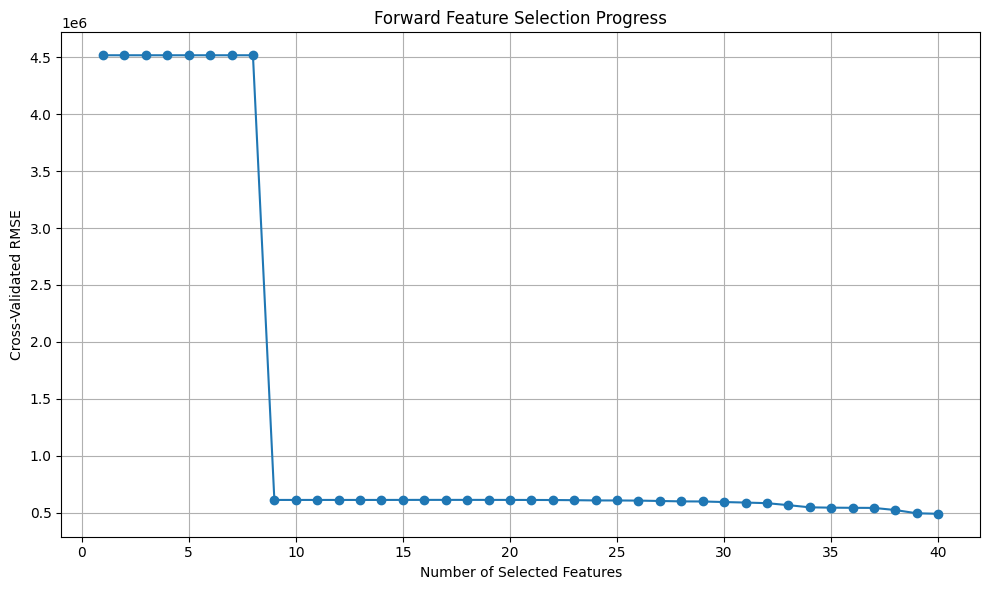

In [61]:
# Investigate forward feature selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

X = X_train_scaled_df
y = y_train

model = LinearRegression()

selected_features = []
remaining_features = list(X.columns)

rmse_scores = []  # Store RMSE scores here
steps = []        # Store step numbers

while remaining_features:
    scores = []
    
    for feature in remaining_features:
        features_to_test = selected_features + [feature]
        
        score = cross_val_score(model, X[features_to_test], y, cv=5, scoring='neg_mean_squared_error').mean()
        
        scores.append((score, feature))
    
    scores.sort()
    
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    
    rmse = np.sqrt(abs(best_score))
    rmse_scores.append(rmse)
    steps.append(len(selected_features))

    print(f"Selected Features: {selected_features} with RMSE: {rmse:.2f}")

print("\nFinal selected features:", selected_features)

# Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(steps, rmse_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated RMSE')
plt.title('Forward Feature Selection Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
X_train_LR = X_train_scaled_df.copy()

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_train_LR, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')

mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Linear Regression: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Linear Regression: ${std_rmse:,.2f}')

Mean CV RMSE for Linear Regression: $490,492.42
Standard Deviation CV RMSE for Linear Regression: $48,715.77


Selected Features: ['taxdelinquencyyear'] with RMSE: 610493.66
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26'] with RMSE: 610511.79
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt'] with RMSE: 610516.87
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid'] with RMSE: 610519.41
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid'] with RMSE: 610520.88
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear'] with RMSE: 610520.88
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid'] with RMSE: 610520.88
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'as

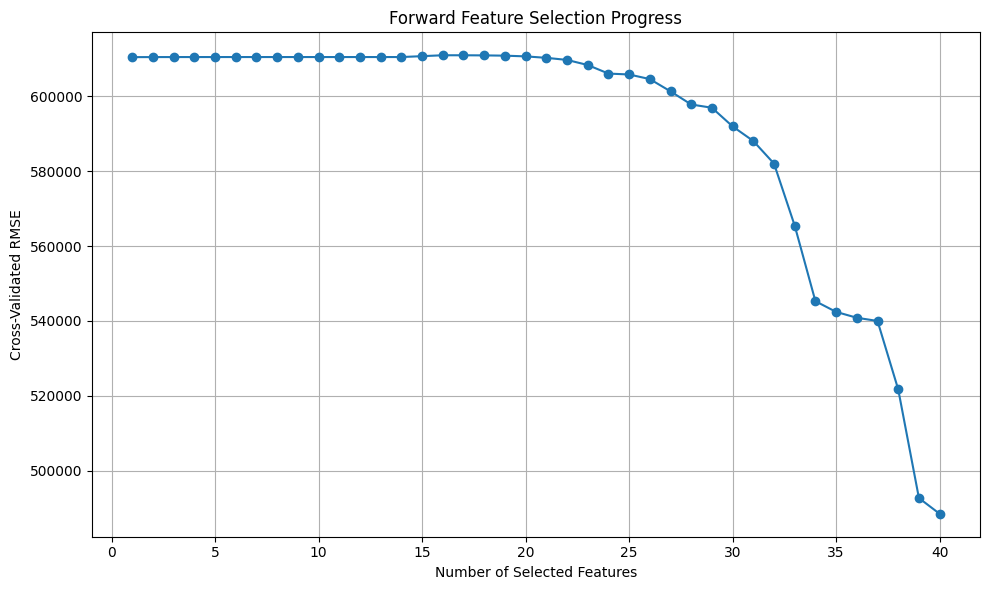

In [62]:
# Ridge Regression

X = X_train_scaled_df
y = y_train

model = Ridge()

selected_features = []
remaining_features = list(X.columns)

rmse_scores = []  # Store RMSE scores here
steps = []        # Store step numbers

while remaining_features:
    scores = []
    
    for feature in remaining_features:
        features_to_test = selected_features + [feature]
        
        score = cross_val_score(model, X[features_to_test], y, cv=5, scoring='neg_mean_squared_error').mean()
        
        scores.append((score, feature))
    
    scores.sort()
    
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    
    rmse = np.sqrt(abs(best_score))
    rmse_scores.append(rmse)
    steps.append(len(selected_features))

    print(f"Selected Features: {selected_features} with RMSE: {rmse:.2f}")

print("\nFinal selected features:", selected_features)

# Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(steps, rmse_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated RMSE')
plt.title('Forward Feature Selection Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
X_train_RR = X_train_scaled_df.copy()

rr = Ridge()

neg_mse_scores = cross_val_score(rr, X_train_RR, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')

mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Ridge Regression: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Ridge Regression: ${std_rmse:,.2f}')

Mean CV RMSE for Ridge Regression: $490,318.41
Standard Deviation CV RMSE for Ridge Regression: $48,278.22


Selected Features: ['taxdelinquencyyear'] with RMSE: 610493.65
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26'] with RMSE: 610511.76
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt'] with RMSE: 610516.85
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid'] with RMSE: 610519.38
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid'] with RMSE: 610520.84
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear'] with RMSE: 610520.84
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid'] with RMSE: 610520.84
Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'as

/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.342e+15, tolerance: 1.799e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.370e+15, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet13', 'basementsqft', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'yardbuildingsqft17', 'threequarterbathnbr', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'fireplacecnt', 'heatingorsystemtypeid', 'garagetotalsqft', 'garagecarcnt', 'log_yearbuilt', 'yearbuilt'] with RMSE: 591482.42


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.815e+15, tolerance: 1.799e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.856e+15, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet13', 'basementsqft', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'yardbuildingsqft17', 'threequarterbathnbr', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'fireplacecnt', 'heatingorsystemtypeid', 'garagetotalsqft', 'garagecarcnt', 'log_yearbuilt', 'yearbuilt', 'bedroomcnt'] with RMSE: 584044.81


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.745e+15, tolerance: 1.799e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.791e+15, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet13', 'basementsqft', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'yardbuildingsqft17', 'threequarterbathnbr', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'fireplacecnt', 'heatingorsystemtypeid', 'garagetotalsqft', 'garagecarcnt', 'log_yearbuilt', 'yearbuilt', 'bedroomcnt', 'buildingqualitytypeid'] with RMSE: 569042.20


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.702e+15, tolerance: 1.799e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.752e+15, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet13', 'basementsqft', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'yardbuildingsqft17', 'threequarterbathnbr', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'fireplacecnt', 'heatingorsystemtypeid', 'garagetotalsqft', 'garagecarcnt', 'log_yearbuilt', 'yearbuilt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet^2'] with RMSE: 546948.16


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.213e+15, tolerance: 1.799e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.261e+15, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet13', 'basementsqft', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'yardbuildingsqft17', 'threequarterbathnbr', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'fireplacecnt', 'heatingorsystemtypeid', 'garagetotalsqft', 'garagecarcnt', 'log_yearbuilt', 'yearbuilt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet^2', 'fullbathcnt'] with RMSE: 528409.50


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.213e+15, tolerance: 1.799e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.261e+15, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet13', 'basementsqft', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'yardbuildingsqft17', 'threequarterbathnbr', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'fireplacecnt', 'heatingorsystemtypeid', 'garagetotalsqft', 'garagecarcnt', 'log_yearbuilt', 'yearbuilt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet^2', 'fullbathcnt', 'bathroomcnt'] with RMSE: 526644.09


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.171e+15, tolerance: 1.799e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.222e+15, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet13', 'basementsqft', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'yardbuildingsqft17', 'threequarterbathnbr', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'fireplacecnt', 'heatingorsystemtypeid', 'garagetotalsqft', 'garagecarcnt', 'log_yearbuilt', 'yearbuilt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet^2', 'fullbathcnt', 'bathroomcnt', 'bath_bedroom_interaction'] with RMSE: 523864.61


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.171e+15, tolerance: 1.799e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.221e+15, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet13', 'basementsqft', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'yardbuildingsqft17', 'threequarterbathnbr', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'fireplacecnt', 'heatingorsystemtypeid', 'garagetotalsqft', 'garagecarcnt', 'log_yearbuilt', 'yearbuilt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet^2', 'fullbathcnt', 'bathroomcnt', 'bath_bedroom_interaction', 'calculatedbathnbr'] with RMSE: 522204.73


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.043e+15, tolerance: 1.799e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.121e+15, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet13', 'basementsqft', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'yardbuildingsqft17', 'threequarterbathnbr', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'fireplacecnt', 'heatingorsystemtypeid', 'garagetotalsqft', 'garagecarcnt', 'log_yearbuilt', 'yearbuilt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet^2', 'fullbathcnt', 'bathroomcnt', 'bath_bedroom_interaction', 'calculatedbathnbr', 'calculatedfinishedsquarefeet'] with RMSE: 492334.69


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.042e+15, tolerance: 1.799e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.120e+15, tolerance: 1.791e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Selected Features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'decktypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet13', 'basementsqft', 'lotsizesquarefeet', 'numberofstories', 'poolsizesum', 'yardbuildingsqft17', 'threequarterbathnbr', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 'fireplacecnt', 'heatingorsystemtypeid', 'garagetotalsqft', 'garagecarcnt', 'log_yearbuilt', 'yearbuilt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet^2', 'fullbathcnt', 'bathroomcnt', 'bath_bedroom_interaction', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12'] with RMSE: 488438.66

Final selected features: ['taxdelinquencyyear', 'yardbuildingsqft26', 'roomcnt', 'architecturalstyletypeid', 'typeconstructiontypeid', 'assessmentyear', 'deck

/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.375e+15, tolerance: 1.891e+12
  model = cd_fast.enet_coordinate_descent(


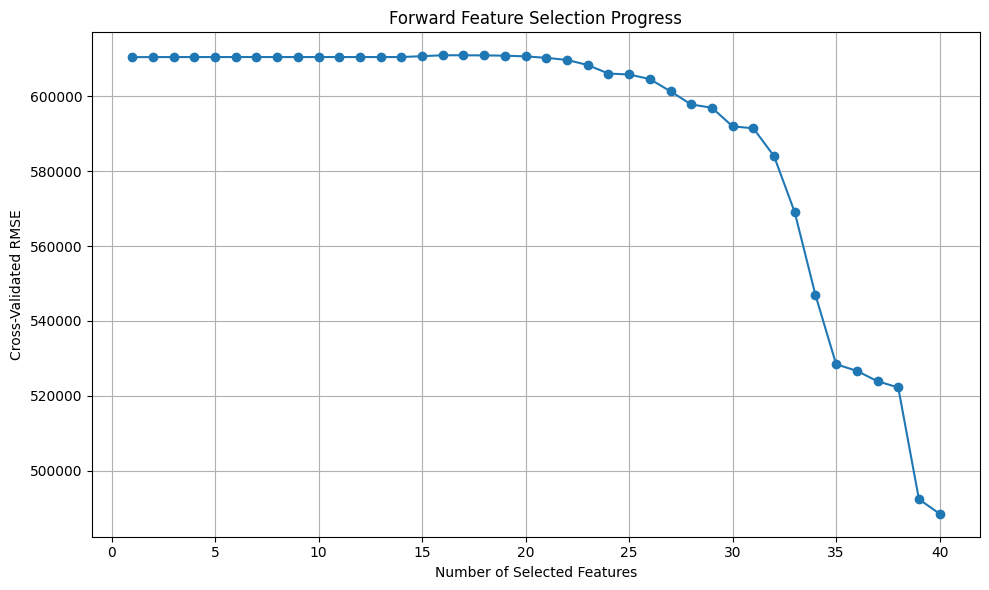

In [63]:
# Lasso Regression

X = X_train_scaled_df
y = y_train

model = Lasso()

selected_features = []
remaining_features = list(X.columns)

rmse_scores = []  # Store RMSE scores here
steps = []        # Store step numbers

while remaining_features:
    scores = []
    
    for feature in remaining_features:
        features_to_test = selected_features + [feature]
        
        score = cross_val_score(model, X[features_to_test], y, cv=5, scoring='neg_mean_squared_error').mean()
        
        scores.append((score, feature))
    
    scores.sort()
    
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    
    rmse = np.sqrt(abs(best_score))
    rmse_scores.append(rmse)
    steps.append(len(selected_features))

    print(f"Selected Features: {selected_features} with RMSE: {rmse:.2f}")

print("\nFinal selected features:", selected_features)

# Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(steps, rmse_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated RMSE')
plt.title('Forward Feature Selection Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

In [94]:
X_train_Lasso = X_train_scaled_df.copy()

lasso = Lasso()

neg_mse_scores = cross_val_score(lasso, X_train_Lasso, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')

mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Lasso: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Lasso: ${std_rmse:,.2f}')

/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.311e+15, tolerance: 1.882e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.927e+15, tolerance: 1.775e+12
  model = cd_fast.enet_coordinate_descent(
/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Mean CV RMSE for Lasso: $490,339.56
Standard Deviation CV RMSE for Lasso: $47,782.47


/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.107e+15, tolerance: 1.808e+12
  model = cd_fast.enet_coordinate_descent(


Selected Features: ['lotsizesquarefeet'] with RMSE: 740882.10
Selected Features: ['lotsizesquarefeet', 'yearbuilt'] with RMSE: 778608.13
Selected Features: ['lotsizesquarefeet', 'yearbuilt', 'finishedsquarefeet50'] with RMSE: 782199.38
Selected Features: ['lotsizesquarefeet', 'yearbuilt', 'finishedsquarefeet50', 'yardbuildingsqft17'] with RMSE: 787117.05
Selected Features: ['lotsizesquarefeet', 'yearbuilt', 'finishedsquarefeet50', 'yardbuildingsqft17', 'unitcnt'] with RMSE: 791774.65
Selected Features: ['lotsizesquarefeet', 'yearbuilt', 'finishedsquarefeet50', 'yardbuildingsqft17', 'unitcnt', 'finishedsquarefeet13'] with RMSE: 789699.78
Selected Features: ['lotsizesquarefeet', 'yearbuilt', 'finishedsquarefeet50', 'yardbuildingsqft17', 'unitcnt', 'finishedsquarefeet13', 'buildingclasstypeid'] with RMSE: 791167.67
Selected Features: ['lotsizesquarefeet', 'yearbuilt', 'finishedsquarefeet50', 'yardbuildingsqft17', 'unitcnt', 'finishedsquarefeet13', 'buildingclasstypeid', 'storytypeid'] wit

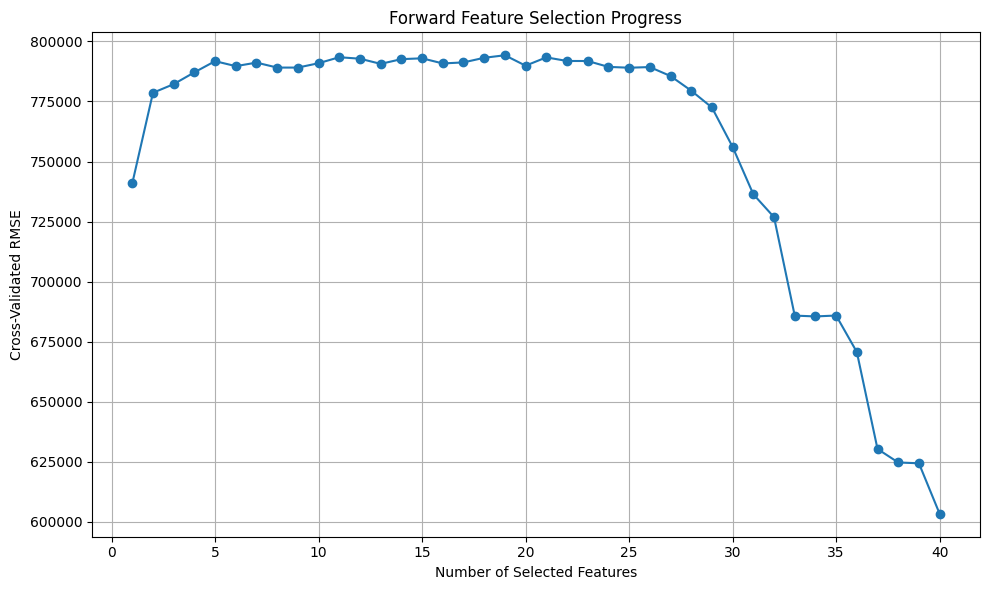

In [64]:
# Decision Tree Regressor

X = X_train_scaled_df
y = y_train

model = DecisionTreeRegressor()

selected_features = []
remaining_features = list(X.columns)

rmse_scores = []  # Store RMSE scores here
steps = []        # Store step numbers

while remaining_features:
    scores = []
    
    for feature in remaining_features:
        features_to_test = selected_features + [feature]
        
        score = cross_val_score(model, X[features_to_test], y, cv=5, scoring='neg_mean_squared_error').mean()
        
        scores.append((score, feature))
    
    scores.sort()
    
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    
    rmse = np.sqrt(abs(best_score))
    rmse_scores.append(rmse)
    steps.append(len(selected_features))

    print(f"Selected Features: {selected_features} with RMSE: {rmse:.2f}")

print("\nFinal selected features:", selected_features)

# Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(steps, rmse_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated RMSE')
plt.title('Forward Feature Selection Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
X_train_DT = X_train_scaled_df[['lotsizesquarefeet', 'yearbuilt', 'finishedsquarefeet50', 'yardbuildingsqft17', 'unitcnt', 
'finishedsquarefeet13', 'buildingclasstypeid', 'storytypeid', 'finishedfloor1squarefeet', 'numberofstories', 'taxdelinquencyyear', 
'pooltypeid2', 'log_yearbuilt', 'finishedsquarefeet6', 'decktypeid', 'finishedsquarefeet15', 'poolcnt', 'basementsqft', 'roomcnt', 
'architecturalstyletypeid', 'pooltypeid7', 'typeconstructiontypeid', 'pooltypeid10', 'assessmentyear', 'yardbuildingsqft26', 
'poolsizesum', 'fireplacecnt', 'threequarterbathnbr', 'garagecarcnt', 'heatingorsystemtypeid', 'bedroomcnt', 'garagetotalsqft', 
'bathroomcnt', 'bath_bedroom_interaction', 'fullbathcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet^2', 
'calculatedfinishedsquarefeet']].copy()

dt = DecisionTreeRegressor()

neg_mse_scores = cross_val_score(dt, X_train_DT, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')

mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Decision Tree Regressor: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Decision Tree Regressor: ${std_rmse:,.2f}')

Mean CV RMSE for Decision Tree Regressor: $628,049.86
Standard Deviation CV RMSE for Decision Tree Regressor: $24,051.16


Selected Features: ['lotsizesquarefeet'] with RMSE: 685708.29
Selected Features: ['lotsizesquarefeet', 'numberofstories'] with RMSE: 693878.11
Selected Features: ['lotsizesquarefeet', 'numberofstories', 'pooltypeid7'] with RMSE: 703683.46
Selected Features: ['lotsizesquarefeet', 'numberofstories', 'pooltypeid7', 'poolcnt'] with RMSE: 697237.48
Selected Features: ['lotsizesquarefeet', 'numberofstories', 'pooltypeid7', 'poolcnt', 'finishedsquarefeet15'] with RMSE: 696158.52
Selected Features: ['lotsizesquarefeet', 'numberofstories', 'pooltypeid7', 'poolcnt', 'finishedsquarefeet15', 'basementsqft'] with RMSE: 700069.39
Selected Features: ['lotsizesquarefeet', 'numberofstories', 'pooltypeid7', 'poolcnt', 'finishedsquarefeet15', 'basementsqft', 'roomcnt'] with RMSE: 694547.23
Selected Features: ['lotsizesquarefeet', 'numberofstories', 'pooltypeid7', 'poolcnt', 'finishedsquarefeet15', 'basementsqft', 'roomcnt', 'yardbuildingsqft26'] with RMSE: 698078.91
Selected Features: ['lotsizesquarefeet

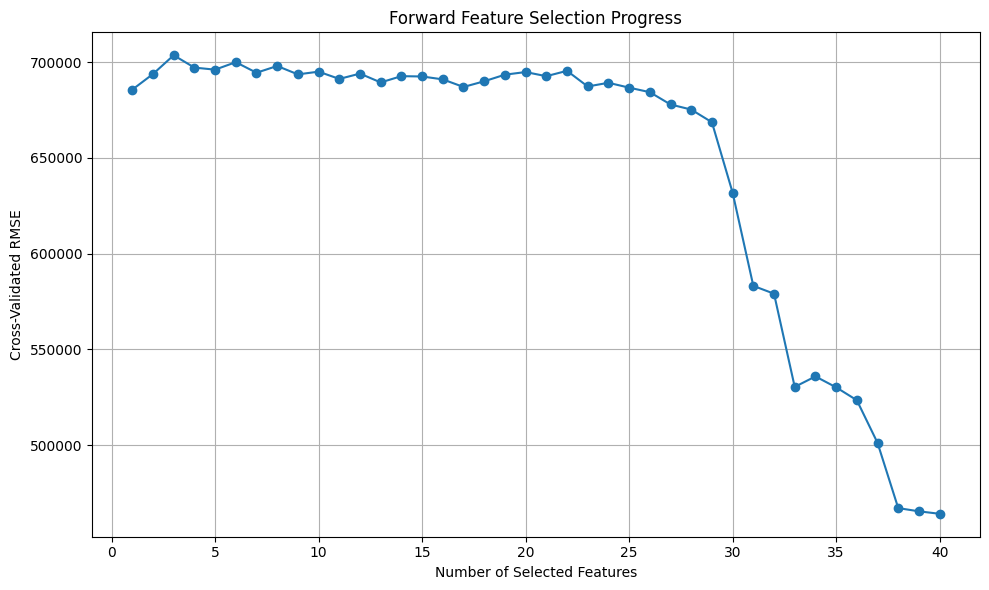

In [65]:
# Bagging Regressor

X = X_train_scaled_df
y = y_train

model = BaggingRegressor()

selected_features = []
remaining_features = list(X.columns)

rmse_scores = []  # Store RMSE scores here
steps = []        # Store step numbers

while remaining_features:
    scores = []
    
    for feature in remaining_features:
        features_to_test = selected_features + [feature]
        
        score = cross_val_score(model, X[features_to_test], y, cv=5, scoring='neg_mean_squared_error').mean()
        
        scores.append((score, feature))
    
    scores.sort()
    
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    
    rmse = np.sqrt(abs(best_score))
    rmse_scores.append(rmse)
    steps.append(len(selected_features))

    print(f"Selected Features: {selected_features} with RMSE: {rmse:.2f}")

print("\nFinal selected features:", selected_features)

# Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(steps, rmse_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated RMSE')
plt.title('Forward Feature Selection Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
X_train_BR = X_train_scaled_df[['lotsizesquarefeet', 'numberofstories', 'pooltypeid7', 'poolcnt', 'finishedsquarefeet15', 'basementsqft', 
                                'roomcnt', 'yardbuildingsqft26', 'architecturalstyletypeid', 'decktypeid', 'yardbuildingsqft17', 
                                'poolsizesum', 'assessmentyear', 'buildingclasstypeid', 'unitcnt', 'finishedsquarefeet6', 'pooltypeid10', 
                                'pooltypeid2', 'typeconstructiontypeid', 'finishedsquarefeet13', 'storytypeid', 'taxdelinquencyyear', 
                                'finishedfloor1squarefeet', 'heatingorsystemtypeid', 'fireplacecnt', 'finishedsquarefeet50', 
                                'threequarterbathnbr', 'garagecarcnt', 'garagetotalsqft', 'bedroomcnt', 'yearbuilt', 'log_yearbuilt', 
                                'bath_bedroom_interaction', 'bathroomcnt', 'calculatedbathnbr', 'fullbathcnt', 'buildingqualitytypeid', 
                                'calculatedfinishedsquarefeet^2']].copy()

br = BaggingRegressor()

neg_mse_scores = cross_val_score(br, X_train_BR, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')

mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Bagging Regressor: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Bagging Regressor: ${std_rmse:,.2f}')

Mean CV RMSE for Bagging Regressor: $463,010.80
Standard Deviation CV RMSE for Bagging Regressor: $17,596.77


Selected Features: ['lotsizesquarefeet'] with RMSE: 675968.43
Selected Features: ['lotsizesquarefeet', 'roomcnt'] with RMSE: 682034.31
Selected Features: ['lotsizesquarefeet', 'roomcnt', 'pooltypeid2'] with RMSE: 682156.62
Selected Features: ['lotsizesquarefeet', 'roomcnt', 'pooltypeid2', 'poolcnt'] with RMSE: 682163.91
Selected Features: ['lotsizesquarefeet', 'roomcnt', 'pooltypeid2', 'poolcnt', 'taxdelinquencyyear'] with RMSE: 681567.84
Selected Features: ['lotsizesquarefeet', 'roomcnt', 'pooltypeid2', 'poolcnt', 'taxdelinquencyyear', 'threequarterbathnbr'] with RMSE: 681768.70
Selected Features: ['lotsizesquarefeet', 'roomcnt', 'pooltypeid2', 'poolcnt', 'taxdelinquencyyear', 'threequarterbathnbr', 'decktypeid'] with RMSE: 681235.40
Selected Features: ['lotsizesquarefeet', 'roomcnt', 'pooltypeid2', 'poolcnt', 'taxdelinquencyyear', 'threequarterbathnbr', 'decktypeid', 'poolsizesum'] with RMSE: 681900.87
Selected Features: ['lotsizesquarefeet', 'roomcnt', 'pooltypeid2', 'poolcnt', 'tax

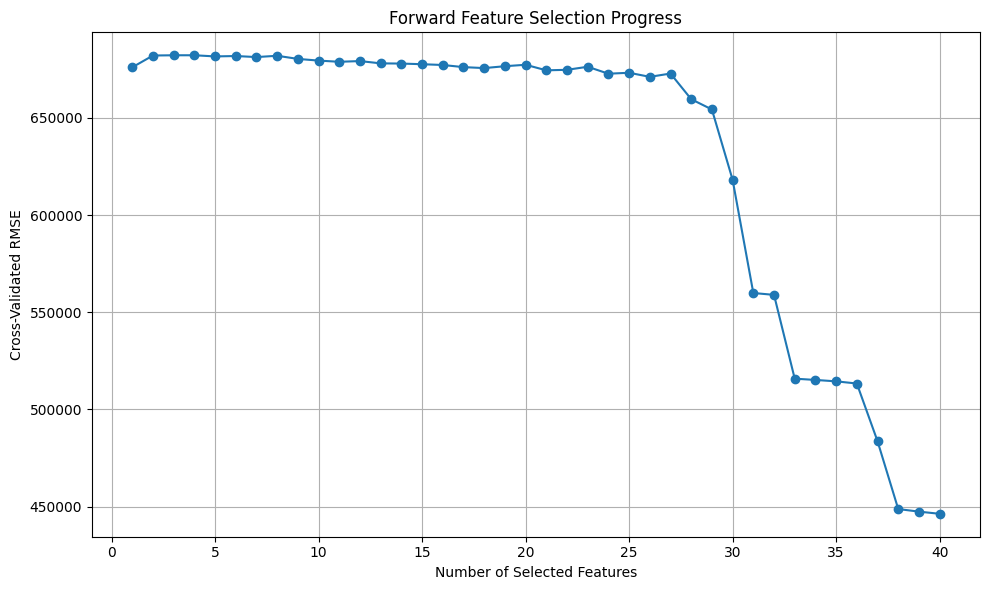

In [68]:
# Random Forest Regressor

X = X_train_scaled_df
y = y_train

model = RandomForestRegressor()


selected_features = []
remaining_features = list(X.columns)

rmse_scores = []  # Store RMSE scores here
steps = []        # Store step numbers

while remaining_features:
    scores = []
    
    for feature in remaining_features:
        features_to_test = selected_features + [feature]
        
        score = cross_val_score(model, X[features_to_test], y, cv=5, scoring='neg_mean_squared_error').mean()
        
        scores.append((score, feature))
    
    scores.sort()
    
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    
    rmse = np.sqrt(abs(best_score))
    rmse_scores.append(rmse)
    steps.append(len(selected_features))

    print(f"Selected Features: {selected_features} with RMSE: {rmse:.2f}")

print("\nFinal selected features:", selected_features)

# Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(steps, rmse_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated RMSE')
plt.title('Forward Feature Selection Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
X_train_RF = X_train_scaled_df[['lotsizesquarefeet', 'roomcnt', 'pooltypeid2', 'poolcnt', 'taxdelinquencyyear', 'threequarterbathnbr', 
                                'decktypeid', 'poolsizesum', 'fireplacecnt', 'storytypeid', 'finishedsquarefeet13', 'pooltypeid7', 
                                'yardbuildingsqft26', 'architecturalstyletypeid', 'unitcnt', 'yardbuildingsqft17', 'buildingclasstypeid', 
                                'basementsqft', 'finishedsquarefeet6', 'pooltypeid10', 'finishedsquarefeet50', 'finishedfloor1squarefeet', 
                                'assessmentyear', 'numberofstories', 'finishedsquarefeet15', 'typeconstructiontypeid', 'heatingorsystemtypeid',
                                'garagecarcnt', 'garagetotalsqft', 'bedroomcnt', 'log_yearbuilt', 'yearbuilt', 'fullbathcnt',
                                'bath_bedroom_interaction', 'bathroomcnt', 'calculatedbathnbr', 'buildingqualitytypeid', 
                                'finishedsquarefeet12']].copy()

rf = RandomForestRegressor()

neg_mse_scores = cross_val_score(rf, X_train_RF, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')

mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Random Forest Regressor: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Random Forest Regressor: ${std_rmse:,.2f}')

Mean CV RMSE for Random Forest Regressor: $447,186.13
Standard Deviation CV RMSE for Random Forest Regressor: $19,661.73


Selected Features: ['yardbuildingsqft26'] with RMSE: 612849.97
Selected Features: ['yardbuildingsqft26', 'finishedsquarefeet15'] with RMSE: 613733.45
Selected Features: ['yardbuildingsqft26', 'finishedsquarefeet15', 'assessmentyear'] with RMSE: 613733.45
Selected Features: ['yardbuildingsqft26', 'finishedsquarefeet15', 'assessmentyear', 'buildingclasstypeid'] with RMSE: 613733.45
Selected Features: ['yardbuildingsqft26', 'finishedsquarefeet15', 'assessmentyear', 'buildingclasstypeid', 'decktypeid'] with RMSE: 613733.45
Selected Features: ['yardbuildingsqft26', 'finishedsquarefeet15', 'assessmentyear', 'buildingclasstypeid', 'decktypeid', 'pooltypeid10'] with RMSE: 613733.45
Selected Features: ['yardbuildingsqft26', 'finishedsquarefeet15', 'assessmentyear', 'buildingclasstypeid', 'decktypeid', 'pooltypeid10', 'poolcnt'] with RMSE: 613733.45
Selected Features: ['yardbuildingsqft26', 'finishedsquarefeet15', 'assessmentyear', 'buildingclasstypeid', 'decktypeid', 'pooltypeid10', 'poolcnt', 

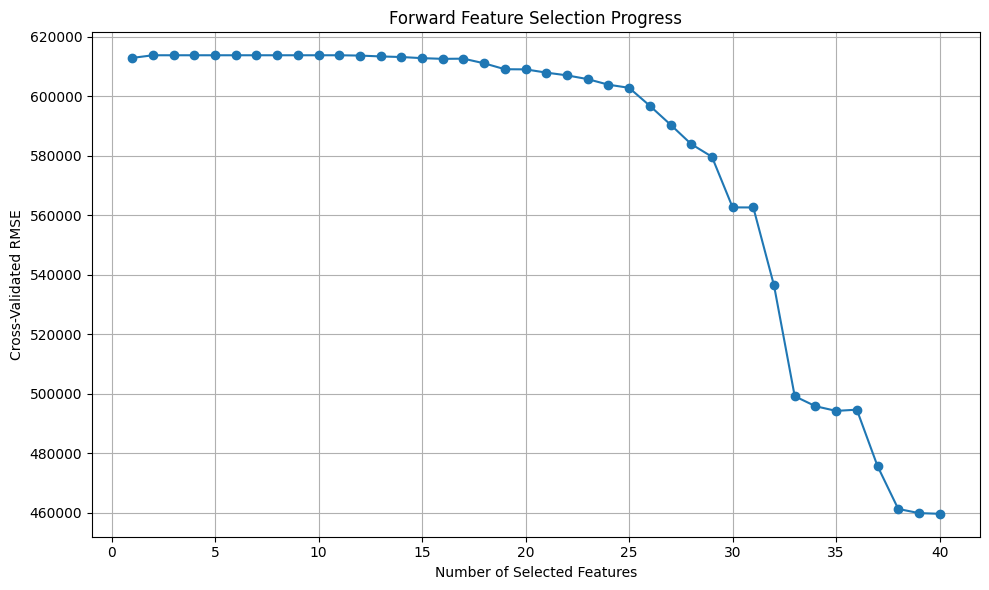

In [67]:
# Gradient Boosting Regressor

X = X_train_scaled_df
y = y_train

model = GradientBoostingRegressor()

selected_features = []
remaining_features = list(X.columns)

rmse_scores = []  # Store RMSE scores here
steps = []        # Store step numbers

while remaining_features:
    scores = []
    
    for feature in remaining_features:
        features_to_test = selected_features + [feature]
        
        score = cross_val_score(model, X[features_to_test], y, cv=5, scoring='neg_mean_squared_error').mean()
        
        scores.append((score, feature))
    
    scores.sort()
    
    best_score, best_feature = scores[0]
    
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    
    rmse = np.sqrt(abs(best_score))
    rmse_scores.append(rmse)
    steps.append(len(selected_features))

    print(f"Selected Features: {selected_features} with RMSE: {rmse:.2f}")

print("\nFinal selected features:", selected_features)

# Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(steps, rmse_scores, marker='o')
plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validated RMSE')
plt.title('Forward Feature Selection Progress')
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
X_train_GB = X_train_scaled_df[['yardbuildingsqft26', 'finishedsquarefeet15', 'assessmentyear', 'buildingclasstypeid', 'decktypeid', 
                                'pooltypeid10', 'poolcnt', 'pooltypeid7', 'pooltypeid2', 'storytypeid', 'typeconstructiontypeid', 
                                'finishedsquarefeet13', 'architecturalstyletypeid', 'taxdelinquencyyear', 'unitcnt', 'finishedsquarefeet6',
                                'basementsqft', 'threequarterbathnbr', 'finishedsquarefeet50', 'poolsizesum', 'numberofstories', 
                                'fireplacecnt', 'roomcnt', 'finishedfloor1squarefeet', 'yardbuildingsqft17', 'heatingorsystemtypeid', 
                                'lotsizesquarefeet', 'garagecarcnt', 'garagetotalsqft', 'yearbuilt', 'log_yearbuilt', 'bedroomcnt', 
                                'bath_bedroom_interaction', 'calculatedbathnbr', 'fullbathcnt', 'bathroomcnt', 'buildingqualitytypeid',
                                'finishedsquarefeet12']].copy()

gb = GradientBoostingRegressor()

neg_mse_scores = cross_val_score(gb, X_train_GB, y_train, cv=repeated_cv, scoring='neg_mean_squared_error')

mse_scores = -neg_mse_scores

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean CV RMSE for Gradient Boosting Regressor: ${mean_rmse:,.2f}')
print(f'Standard Deviation CV RMSE for Gradient Boosting Regressor: ${std_rmse:,.2f}')

Mean CV RMSE for Gradient Boosting Regressor: $451,221.31
Standard Deviation CV RMSE for Gradient Boosting Regressor: $22,291.31


In [102]:
# Data for the summary table
data = {
    'Model': [
        'Linear Regression', 
        'Ridge Regression', 
        'Lasso Regression', 
        'Decision Tree', 
        'Bagging Regressor', 
        'Random Forest', 
        'Gradient Boosting'
    ],
    'Post-Feature-Selection Mean RMSE ($)': [
       490492.42,
       490318.41,
       490339.56,
       628049.86,
       466082.39,
       447186.13,
       451221.31
    ],
    'Post-Feature-Selection Std RMSE ($)': [
        48715.77, 
        48278.22,
        47782.47,
        24051.16,
        19166.27,
        19661.73,
        22291.31
    ]
}

rmse_df = pd.DataFrame(data)

print(rmse_df)



               Model  Post-Feature-Selection Mean RMSE ($)  \
0  Linear Regression                             490492.42   
1   Ridge Regression                             490318.41   
2   Lasso Regression                             490339.56   
3      Decision Tree                             628049.86   
4  Bagging Regressor                             466082.39   
5      Random Forest                             447186.13   
6  Gradient Boosting                             451221.31   

   Post-Feature-Selection Std RMSE ($)  
0                             48715.77  
1                             48278.22  
2                             47782.47  
3                             24051.16  
4                             19166.27  
5                             19661.73  
6                             22291.31  


Analyze the effect of feature selection on your models:
1. Did performance improve for any models after reducing the number of features?

   No, in this case the models did not seem to improve when features were removed. With the exception of the linear regression, where many features were removed because inclusion of more features did not substantially improve the model performance, a substantial increase in RMSE was seem with more than 2 features removed. Cases where two features were removed (the tree-based models), the mean CV score was not all that different from performance with all features, and saving the computational power of dropping those features seemed worthwhile. It did make us wonder about which features we dropped in Milestone 1 and how they were selected. 

3. Which features were consistently retained across models?

   Most features were retained by all models. However, the bottom three features were consistent for our three best models: 'calculatedfinishedsquarefeet', 'calculatedfinishedsquarefeet^2', and 'finishedsquarefeet12'. The order was different for the bagging regressor model, so the two features dropped were also different by one. Given the fact that they are all related to square footage, our assumption based on this result is that they primarily share variance with another variable that is selected earlier in the forward feature selection process and they they do not seem to add much additional information to improve the model. 

5. Were any of your newly engineered features selected as important?

   None of the newly engineered features were selected in the top ten variables for any model, but both our log term and interaction term were kept in the feature list across the board. As addressed briefly above, 'calculatedfinishedsquarefeet^2' was in the bottom three likely because there are several square-footage related variables with shared variance. 

7. How did feature selection differ between linear and tree-based models?

   Similar to the previous iterations, the linear models perform very similarly to each other and did not seem to benefit from dropping features. The decision tree model performed slightly worse when a couple features were dropped, though the difference was not massive, and they still perform better than the linear models and show substantially tighter variance/greater stability. The decision tree model stands apart from the rest, performing substaintially worse than all other model types overall, though it does demonstrate greater stability with about half the standard deviation of the linear models.

### Part 4: Fine-Tuning Your Top 3 Models [6 pts]

In this final phase of Milestone 2, you’ll select and refine your **three most promising models and their corresponding data pipelines** based on everything you've done so far.

1. Choose the top 3 models based on performance and interpretability from earlier parts.
2. For each model:
   - Perform hyperparameter tuning using `sweep_parameters`, `GridSearchCV`, `RandomizedSearchCV`, or other techniques from previous homeworks. 
   - Experiment with different versions of your feature engineering and preprocessing — treat these as additional tunable components.
3. Report the mean and standard deviation of CV RMSE score for each model in a summary table.



In [110]:
# sweep_params for train only

def sweep_parameter(model,
                    Parameters,
                    param,
                    parameter_list,
                    X_train          = X_train,
                    y_train          = y_train,
                    verbose          = True,
                    show_rmse        = True,
                    n_iter_no_change = None,
                    delta            = 0.001,
                    n_jobs           = -1,
                    n_repeats        = 10):
    
    start = time.time()
    Parameters = Parameters.copy()  # Avoid modifying the original dictionary
    
    cv_mses, std_cvs, train_mses = [], [], []
    no_improve_count = 0
    best_mse = float('inf')
    
    # Run over each value in parameter_list
    for p in tqdm(parameter_list, desc=f"Sweeping {param}"):
        Parameters[param] = p
        P_temp = Parameters.copy()
        # Remove MSE_found if present, just in case
        P_temp.pop('MSE_found', None)
        
        cv_mse, std_cv, train_mse = run_model(
            model=model,
            X_train=X_train, y_train=y_train,
            n_repeats=n_repeats,
            n_jobs=n_jobs,
            **P_temp
        )
        cv_mses.append(cv_mse)
        std_cvs.append(std_cv)
        train_mses.append(train_mse)
        
        # Early-stopping logic
        if cv_mse < best_mse - delta:
            best_mse = cv_mse
            no_improve_count = 0
        else:
            no_improve_count += 1
        
        if n_iter_no_change is not None and no_improve_count >= n_iter_no_change:
            print(f"Early stopping: No improvement after {n_iter_no_change} iterations.")
            break
    
    # Identify best parameter
    min_cv_mse = min(cv_mses)
    min_index = cv_mses.index(min_cv_mse)
    best_param = parameter_list[min_index]
    Parameters[param] = best_param
    Parameters['MSE_found'] = min_cv_mse
    
    if verbose:
        # Prepare for plotting
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
        
        # We only need as many parameter values as we actually computed
        partial_param_list = parameter_list[:len(cv_mses)]
        
        # Check if our parameter list is Boolean so we can label accordingly
        is_boolean = all(isinstance(val, bool) for val in partial_param_list)
        if is_boolean:
            # Convert booleans to integer indices for plotting
            x_vals = list(range(len(partial_param_list)))
            x_labels = [str(val) for val in partial_param_list]
        else:
            # Treat numeric or other types as-is
            x_vals = partial_param_list
            x_labels = partial_param_list
        
        error_name = 'RMSE' if show_rmse else 'MSE'
        
        # ----- First plot: (R)MSE -----
        ax1.set_title(f"{error_name} vs {param}")
        
        # Apply dollar formatting ONLY if we're showing RMSE
        if show_rmse:
            ax1.yaxis.set_major_formatter(mticker.FuncFormatter(dollar_format))
        
        # Plot lines
        ax1.plot(x_vals,
                 np.sqrt(cv_mses) if show_rmse else cv_mses,
                 marker='.', label=f"CV {error_name}", color='blue')
        ax1.plot(x_vals,
                 np.sqrt(train_mses) if show_rmse else train_mses,
                 marker='.', label=f"Train {error_name}", color='green')
        ax1.scatter([x_vals[min_index]],
                    [np.sqrt(min_cv_mse) if show_rmse else min_cv_mse],
                    marker='x', label=f"Best CV {error_name}", color='red')
        
        ax1.set_ylabel(error_name)
        ax1.legend()
        ax1.grid()
        
        # ----- Second plot: CV Std Dev -----
        ax2.set_title(f"CV Standard Deviation vs {param}")
        ax2.plot(x_vals, std_cvs, marker='.', label=f"CV {error_name} Std", color='blue')
        ax2.set_xlabel(param)
        ax2.set_ylabel("Standard Deviation")
        ax2.legend()
        ax2.grid(alpha=0.5)
        
        # If we are using boolean x-values, set custom ticks
        if is_boolean:
            ax2.set_xticks(x_vals)
            ax2.set_xticklabels(x_labels)
        
        plt.tight_layout()
        plt.show()
        
        end = time.time()
        print("Execution Time:", time.strftime("%H:%M:%S", time.gmtime(end - start)))
    
    return Parameters


In [112]:
# Run model for train-only

def run_model(model, X_train, y_train, n_repeats=10, n_jobs=-1, **model_params):
    model_instance = model(**model_params)
    
    rkf = RepeatedKFold(n_splits=5, n_repeats=n_repeats, random_state=42)
    cv_scores = cross_val_score(model_instance, X_train, y_train,
                                 scoring='neg_mean_squared_error',
                                 cv=rkf, n_jobs=n_jobs)
    
    model_instance.fit(X_train, y_train)
    train_preds = model_instance.predict(X_train)
    train_mse = mean_squared_error(y_train, train_preds)
    
    return -cv_scores.mean(), cv_scores.std(), train_mse

In [104]:
# Define the parameters for the BaggingRegressor
Default_Parameters_Bagging = {
    'n_estimators': 10,            # Number of base estimators in the ensemble
    'max_samples' : 1.0,           # Fraction of samples to draw for each base estimator
    'max_features': 1.0,           # Fraction of features to consider for each estimator
    'bootstrap'   : True,          # Use bootstrap samples when building estimators
    'random_state': 42,            # Ensures reproducibility
    'MSE_found'   : float('inf')   # Used for tracking the best MSE during parameter sweeps, to record result of these parameter choices
                                   # Initialized to inf in case want to use this to record best MSE found so far in a sequence of parameter choices
}


Sweeping n_estimators: 100%|████████████████████| 10/10 [06:02<00:00, 36.22s/it]


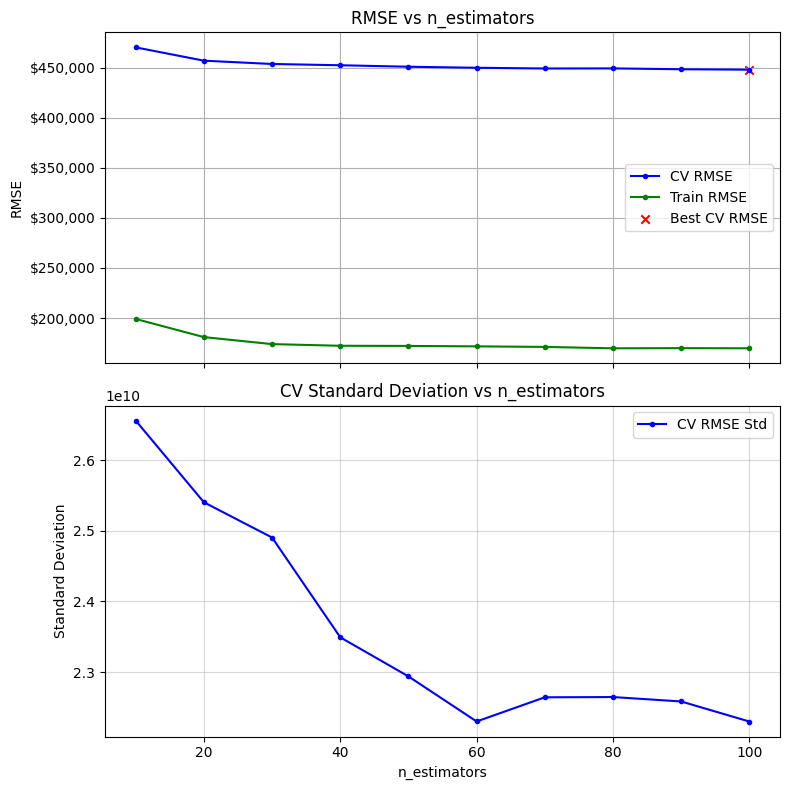

Execution Time: 00:06:02

Parameter n_estimators = 100 RMSE = $447,837.45

{'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(200558384496.8288)}



Sweeping max_samples: 100%|█████████████████████| 10/10 [06:58<00:00, 41.89s/it]


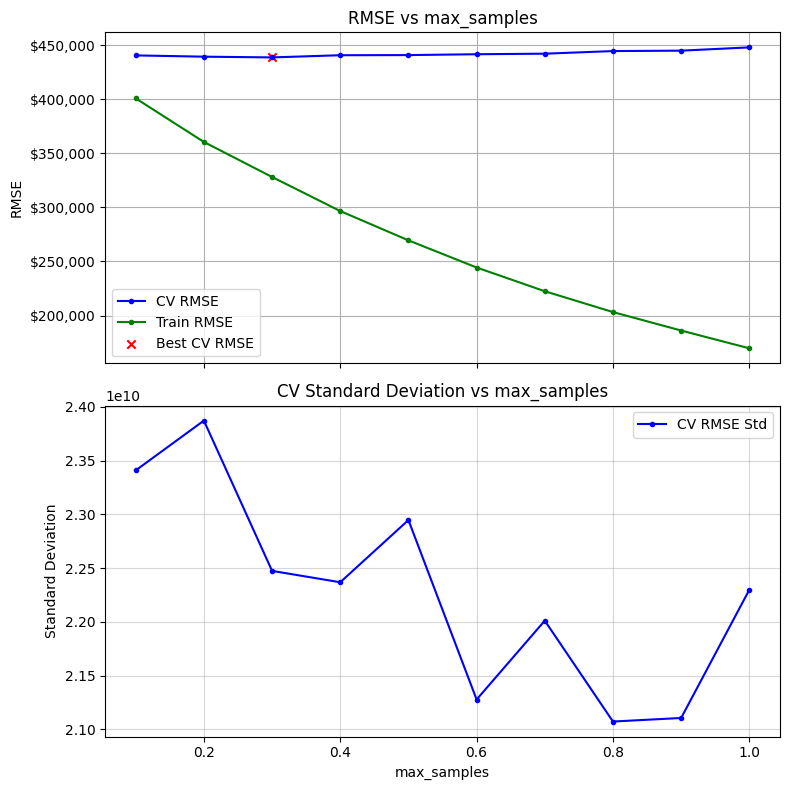

Execution Time: 00:06:58

Parameter max_samples = 0.30000000000000004 RMSE = $438,570.48

{'n_estimators': 100, 'max_samples': 0.30000000000000004, 'max_features': 1.0, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(192344062610.8566)}



Sweeping max_features: 100%|██████████████████████| 7/7 [01:41<00:00, 14.53s/it]


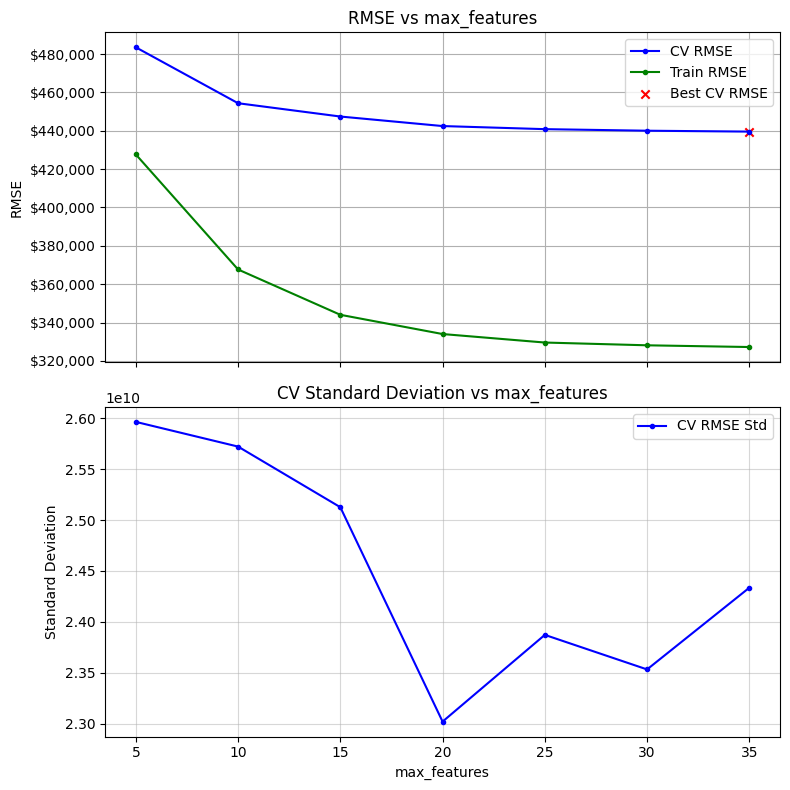

Execution Time: 00:01:41

Parameter max_features = 35 RMSE = $439,577.81

{'n_estimators': 100, 'max_samples': 0.30000000000000004, 'max_features': 35, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(193228653337.83273)}



Sweeping bootstrap: 100%|█████████████████████████| 2/2 [00:53<00:00, 26.62s/it]


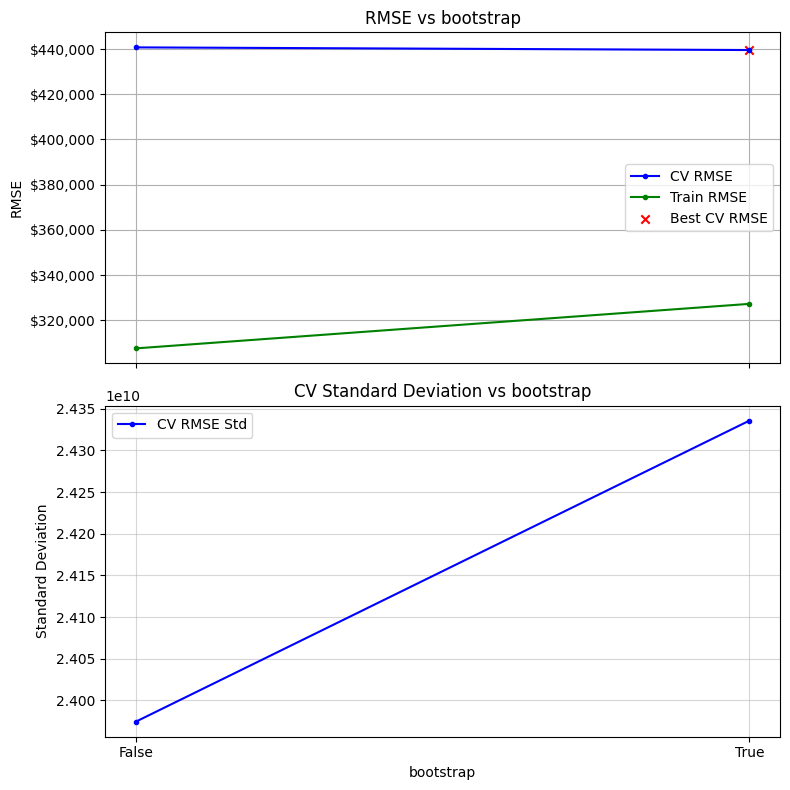

Execution Time: 00:00:53

Parameter bootstrap = True RMSE = $439,577.81

{'n_estimators': 100, 'max_samples': 0.30000000000000004, 'max_features': 35, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(193228653337.83273)}



,n_estimators,max_samples,max_features,bootstrap,random_state,MSE_found
0,100,0.3,35,True,42,1.932287e+11


In [118]:
Params_BT = Default_Parameters_Bagging.copy()
Params_BT_List = []

parameters_and_ranges = [('n_estimators', range(10,101,10)),
                         ('max_samples', np.linspace(0.1,1.0,10).tolist()),
                         ('max_features', range(5,40,5)),
                         ('bootstrap', [False,True])
                        ]

for (param, parameter_list) in parameters_and_ranges:
    Params_BT = sweep_parameter(BaggingRegressor,
                                Params_BT,
                                param,
                                parameter_list,
                                X_train=X_train_scaled_df,
                                n_jobs = -1,
                                n_repeats = 1              # want to end at 10
                               )
    print(f"\nParameter {param} = {Params_BT[param]} RMSE = ${Params_BT['MSE_found']**0.5:,.2f}\n")
    print(Params_BT)
    print()

Params_BT_List.append(Params_BT)

pd.DataFrame(Params_BT_List)

Sweeping n_estimators: 100%|███████████████████| 17/17 [55:22<00:00, 195.42s/it]


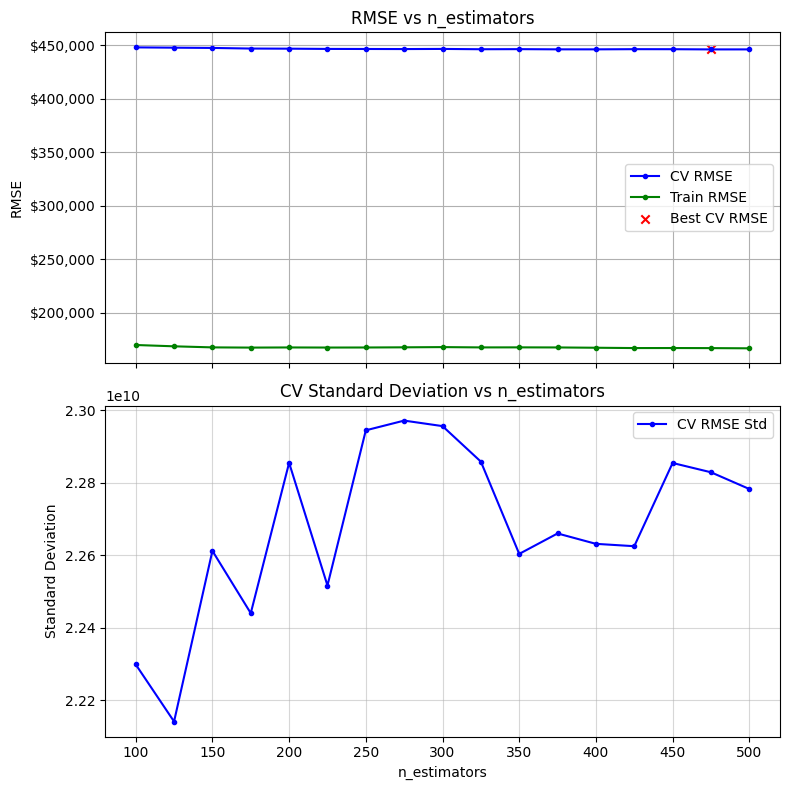

Execution Time: 00:55:22

Parameter n_estimators = 475 RMSE = $445,936.74

{'n_estimators': 475, 'max_samples': 1.0, 'max_features': 1.0, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(198859572733.37918)}



Sweeping max_samples: 100%|██████████████████████| 5/5 [09:04<00:00, 108.82s/it]


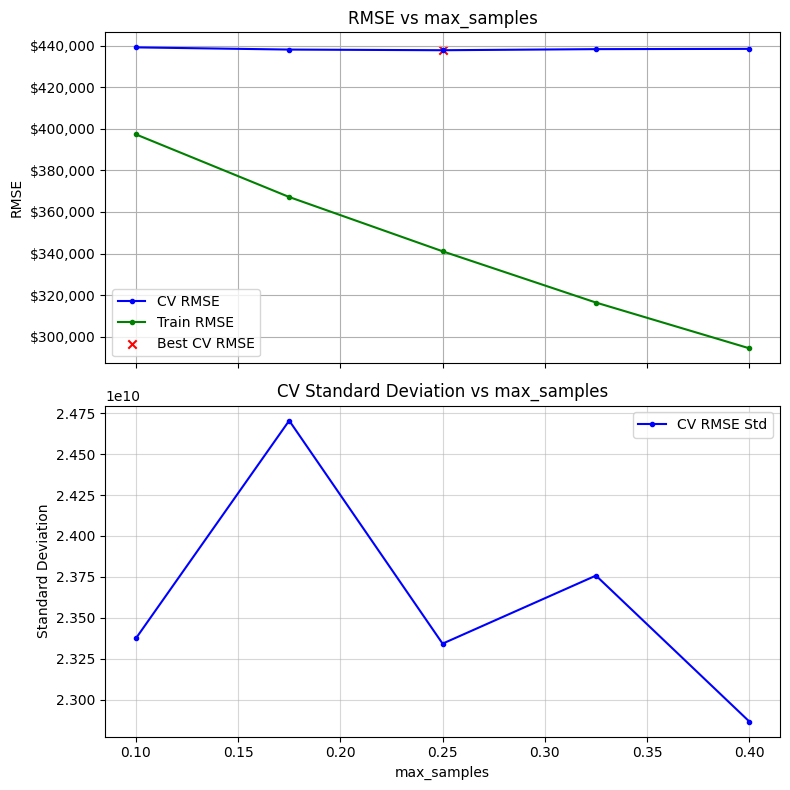

Execution Time: 00:09:04

Parameter max_samples = 0.25 RMSE = $437,848.41

{'n_estimators': 475, 'max_samples': 0.25, 'max_features': 1.0, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(191711230403.04068)}



Sweeping max_features:  89%|███████████████████▌  | 8/9 [12:07<01:30, 91.00s/it]


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py", line 389, in fit
    return self._fit(X, y, max_samples=self.max_samples, **fit_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ez873/jupyter_env/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py", line 480, in _fit
    raise ValueError("max_features must be <= n_features")
ValueError: max_features must be <= n_features


In [119]:
Params_BT = Default_Parameters_Bagging.copy()
Params_BT_List = []

parameters_and_ranges = [('n_estimators', range(100,501,25)),
                         ('max_samples', np.linspace(0.1,0.4,5).tolist()),
                         ('max_features', range(25,42,2)),
                         ('bootstrap', [False,True])
                        ]

for (param, parameter_list) in parameters_and_ranges:
    Params_BT = sweep_parameter(BaggingRegressor,
                                Params_BT,
                                param,
                                parameter_list,
                                X_train=X_train_scaled_df,
                                n_jobs = -1,
                                n_repeats = 1              # want to end at 10
                               )
    print(f"\nParameter {param} = {Params_BT[param]} RMSE = ${Params_BT['MSE_found']**0.5:,.2f}\n")
    print(Params_BT)
    print()

Params_BT_List.append(Params_BT)

pd.DataFrame(Params_BT_List)

Sweeping max_features: 100%|██████████████████████| 8/8 [00:45<00:00,  5.69s/it]


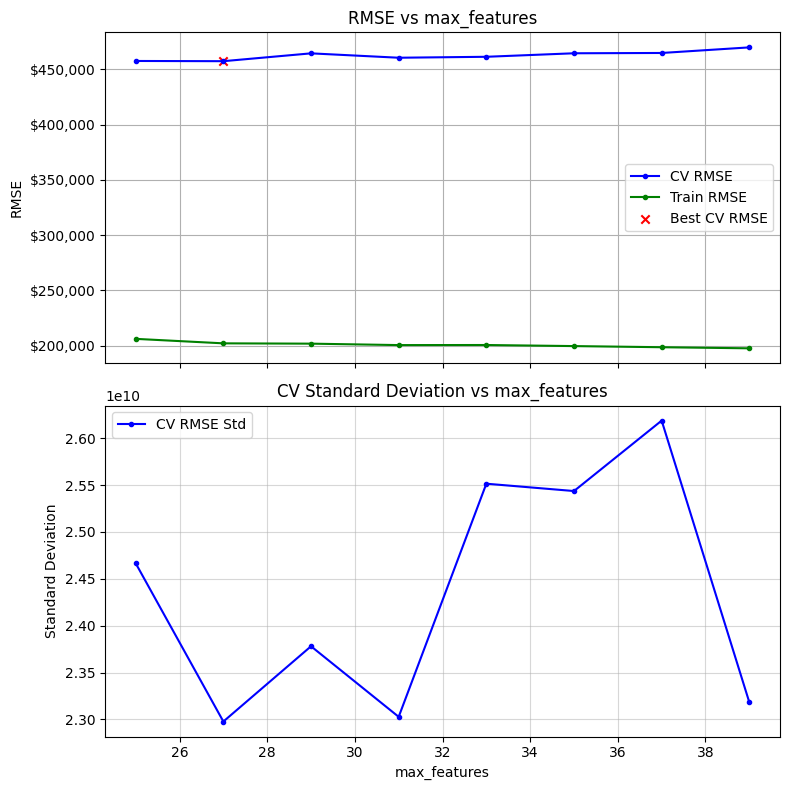

Execution Time: 00:00:45

Parameter max_features = 27 RMSE = $457,282.50

{'n_estimators': 10, 'max_samples': 1.0, 'max_features': 27, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(209107287799.43353)}



Sweeping bootstrap: 100%|█████████████████████████| 2/2 [00:11<00:00,  5.99s/it]


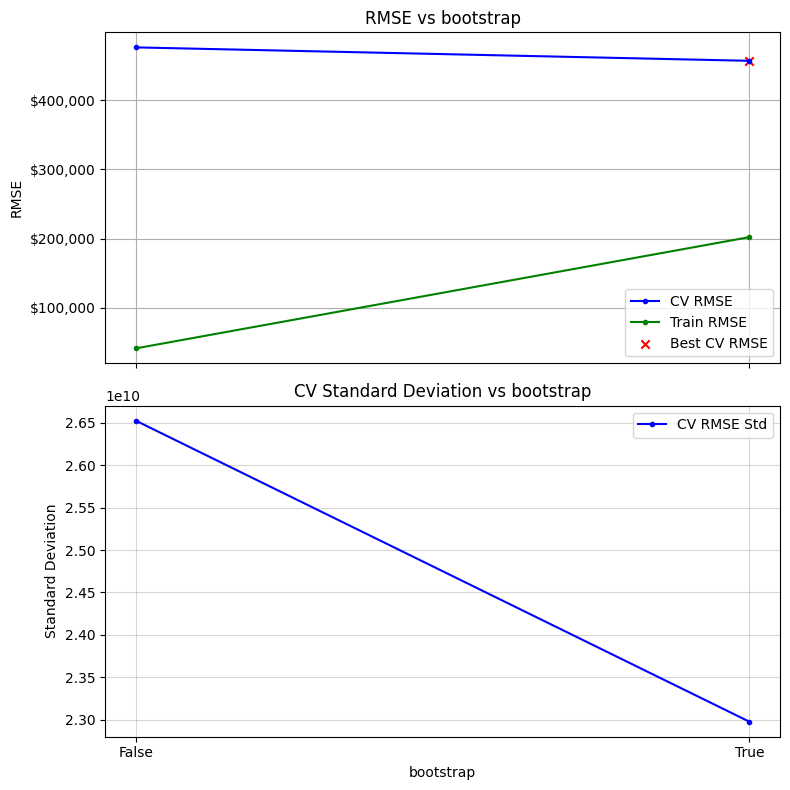

Execution Time: 00:00:12

Parameter bootstrap = True RMSE = $457,282.50

{'n_estimators': 10, 'max_samples': 1.0, 'max_features': 27, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(209107287799.43353)}



,n_estimators,max_samples,max_features,bootstrap,random_state,MSE_found
0,10,1.0,27,True,42,2.091073e+11


In [120]:
Params_BT = Default_Parameters_Bagging.copy()
Params_BT_List = []

parameters_and_ranges = [
                         ('max_features', range(25,40,2)),
                         ('bootstrap', [False,True])
                        ]

for (param, parameter_list) in parameters_and_ranges:
    Params_BT = sweep_parameter(BaggingRegressor,
                                Params_BT,
                                param,
                                parameter_list,
                                X_train=X_train_scaled_df,
                                n_jobs = -1,
                                n_repeats = 1              # want to end at 10
                               )
    print(f"\nParameter {param} = {Params_BT[param]} RMSE = ${Params_BT['MSE_found']**0.5:,.2f}\n")
    print(Params_BT)
    print()

Params_BT_List.append(Params_BT)

pd.DataFrame(Params_BT_List)

In [131]:
### READY TO RUN ###
# Your code here -- Add as many code cells as necessary
start = time.time()

# Define parameter grid correctly using dictionary syntax
param_grid = {
    'n_estimators': range(465, 486, 5),  # Values from 250 to 300 in steps of 5
    'max_samples': np.linspace(0.2, 0.3, 5).tolist(),  # Fixed value
    'max_features': range(25, 29, 1),  # Values from 20 to 50 in steps of 1
    'bootstrap': [True]  # Fixed value
}

# Initialize BaggingRegressor
bagging_regressor = BaggingRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=bagging_regressor,
    param_grid=param_grid,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42),  # Corrected cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract results
results = grid_search.cv_results_

# Sort results by best mean test score (higher is better since we use neg-MSE)
sorted_indices = np.argsort(results['mean_test_score'])[::-1]

# Print top 10 results
print("Top 10 Results:")
for rank, idx in enumerate(sorted_indices[:10], start=1):
    print(f"Rank {rank}: Params={results['params'][idx]}, RMSE={(-results['mean_test_score'][idx])**0.5:.4f}")

# Print best parameters
print("\nBest Parameters:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_)**0.5)

# Execution time
end = time.time()
print("\nExecution Time:", time.strftime("%H:%M:%S", time.gmtime(end - start)))

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


/Users/ez873/jupyter_env/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Top 10 Results:
Rank 1: Params={'bootstrap': True, 'max_features': 28, 'max_samples': 0.3, 'n_estimators': 475}, RMSE=437660.9099
Rank 2: Params={'bootstrap': True, 'max_features': 28, 'max_samples': 0.3, 'n_estimators': 485}, RMSE=437671.0083
Rank 3: Params={'bootstrap': True, 'max_features': 28, 'max_samples': 0.3, 'n_estimators': 480}, RMSE=437678.5405
Rank 4: Params={'bootstrap': True, 'max_features': 28, 'max_samples': 0.3, 'n_estimators': 470}, RMSE=437726.6532
Rank 5: Params={'bootstrap': True, 'max_features': 28, 'max_samples': 0.3, 'n_estimators': 465}, RMSE=437766.8197
Rank 6: Params={'bootstrap': True, 'max_features': 28, 'max_samples': 0.275, 'n_estimators': 475}, RMSE=437850.1308
Rank 7: Params={'bootstrap': True, 'max_features': 28, 'max_samples': 0.275, 'n_estimators': 480}, RMSE=437853.5967
Rank 8: Params={'bootstrap': True, 'max_features': 28, 'max_samples': 0.275, 'n_estimators': 485}, RMSE=437855.0777
Rank 9: Params={'bootstrap': True, 'max_features': 28, 'max_sample

In [134]:
model = BaggingRegressor
run_model(model, X_train_scaled_df, y_train,bootstrap=True, max_features=28, max_samples=0.3, n_estimators= 475, random_state=42)

/Users/ez873/jupyter_env/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


(np.float64(191524905676.96417),
 np.float64(20830002768.088543),
 105925904753.28049)

In [122]:
# Define the parameters for the Random Forest

Default_Parameters_Random_Forests = {
    'n_estimators': 100,         # Number of base estimators in the ensemble
    'max_features': None,        # Number of features to consider when looking for the best split 
    'max_depth'   : None,        # Limits the depth of each tree
    'bootstrap'   : True,        # Use bootstrap samples when building estimators
    'random_state': 42,          # Ensures reproducibility
    'MSE_found'   : float('inf') # Used for tracking the best MSE during parameter sweeps, to record result of these parameter choices
                                 # Initialized to inf in case want to use this to record best MSE found so far in a sequence of parameter choices
}

Sweeping n_estimators: 100%|████████████████████| 10/10 [11:42<00:00, 70.28s/it]


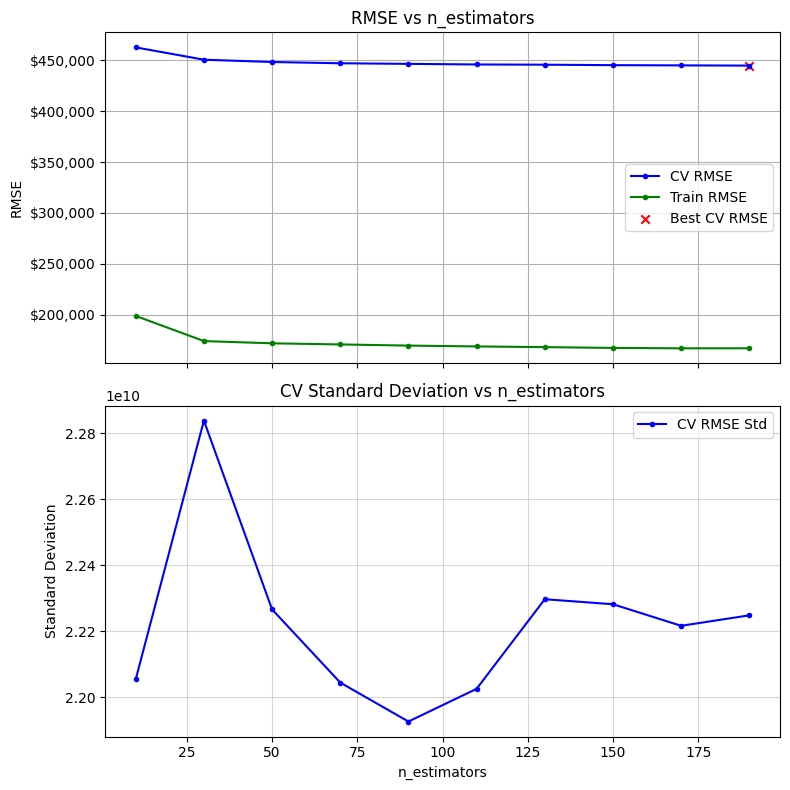

Execution Time: 00:11:42

Parameter n_estimators = 190 RMSE = $444,763.16

{'n_estimators': 190, 'max_features': None, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(197814268599.71368)}



Sweeping max_features: 100%|██████████████████████| 8/8 [09:10<00:00, 68.85s/it]


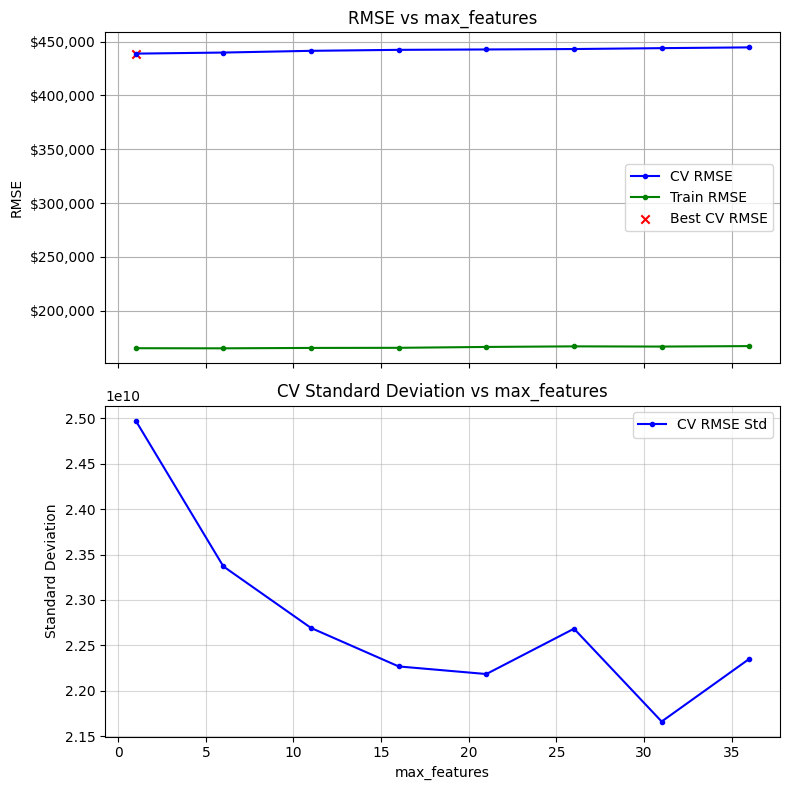

Execution Time: 00:09:10

Parameter max_features = 1 RMSE = $438,898.12

{'n_estimators': 190, 'max_features': 1, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(192631558598.19473)}



Sweeping max_depth: 100%|█████████████████████████| 8/8 [01:30<00:00, 11.35s/it]


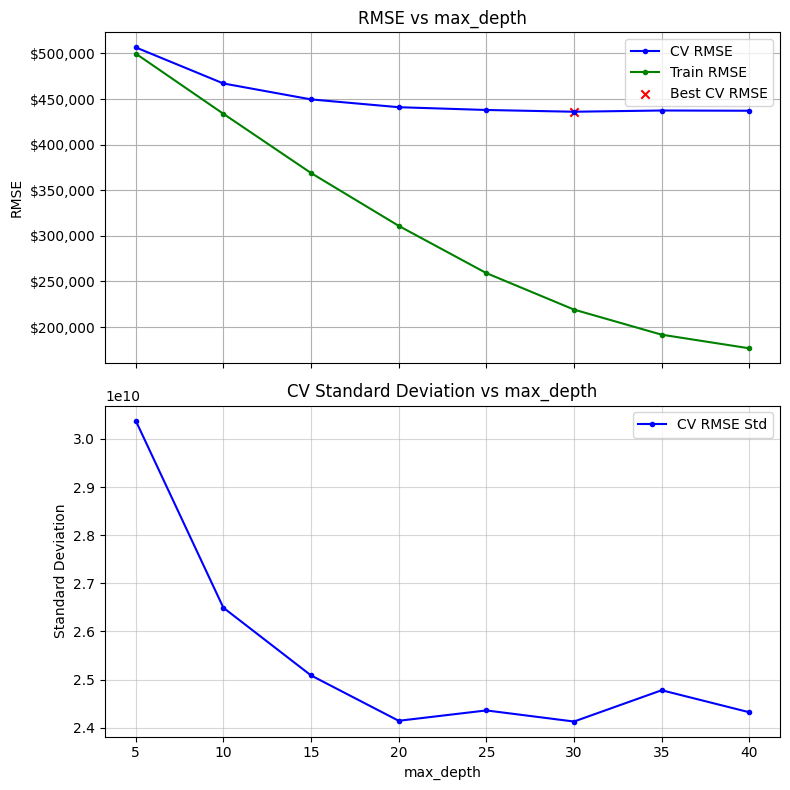

Execution Time: 00:01:30

Parameter max_depth = 30 RMSE = $436,051.12

{'n_estimators': 190, 'max_features': 1, 'max_depth': 30, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(190140578544.85886)}



Sweeping bootstrap: 100%|█████████████████████████| 2/2 [00:38<00:00, 19.10s/it]


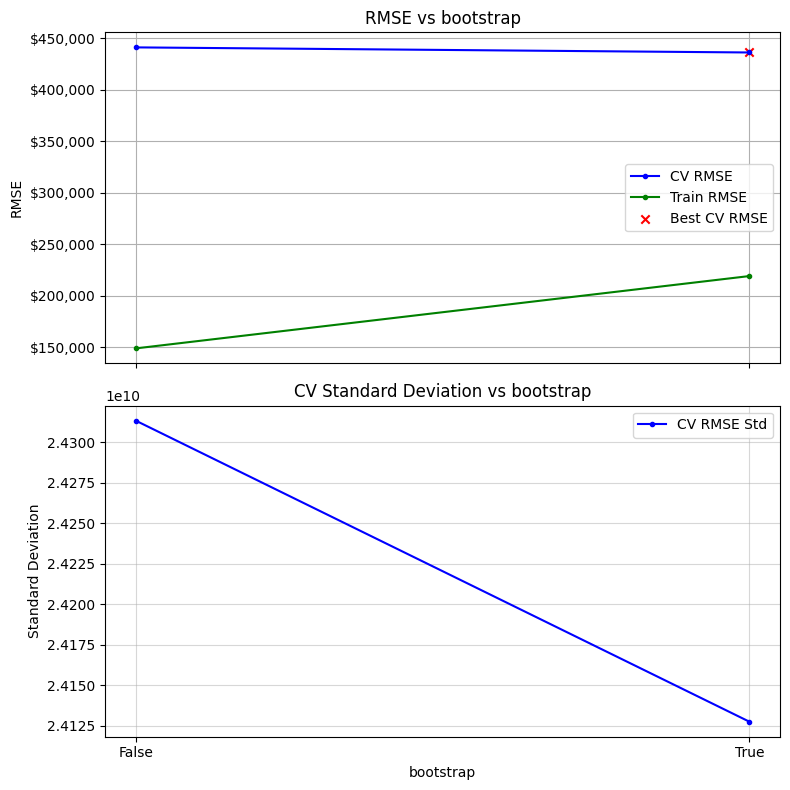

Execution Time: 00:00:38

Parameter bootstrap = True RMSE = $436,051.12

{'n_estimators': 190, 'max_features': 1, 'max_depth': 30, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(190140578544.85886)}



,n_estimators,max_features,max_depth,bootstrap,random_state,MSE_found
0,190,1,30,True,42,1.901406e+11


In [124]:
Params_RF = Default_Parameters_Random_Forests.copy()
Params_RF_List = []

parameters_and_ranges = [('n_estimators', range(10,201,20)),
                         ('max_features', range(1,41,5)),
                         ('max_depth', range(5,41,5)),
                         ('bootstrap', [False,True])
                        ]

for (param, parameter_list) in parameters_and_ranges:
    Params_RF = sweep_parameter(RandomForestRegressor,
                                Params_RF,
                                param,
                                parameter_list,
                                n_jobs = -1,
                                n_repeats = 2              # want to end at 10
                               )
    print(f"\nParameter {param} = {Params_RF[param]} RMSE = ${Params_RF['MSE_found']**0.5:,.2f}\n")
    print(Params_RF)
    print()

Params_RF_List.append(Params_RF)

pd.DataFrame(Params_RF_List)

Sweeping n_estimators: 100%|█████████████████████| 8/8 [30:07<00:00, 225.88s/it]


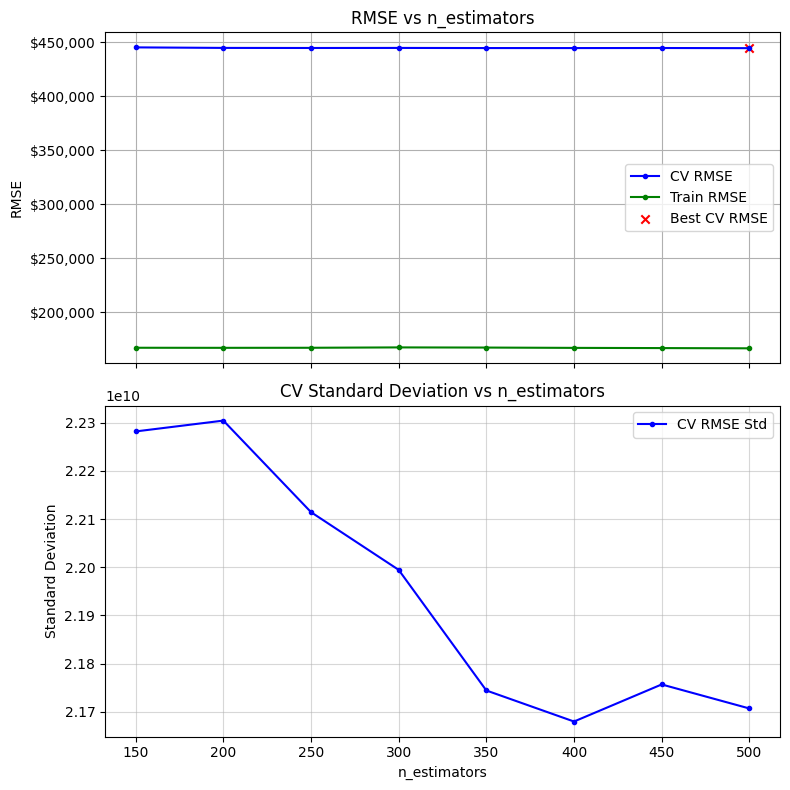

Execution Time: 00:30:07

Parameter n_estimators = 500 RMSE = $444,487.42

{'n_estimators': 500, 'max_features': None, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(197569068305.97012)}



Sweeping max_features: 100%|██████████████████████| 4/4 [04:09<00:00, 62.38s/it]


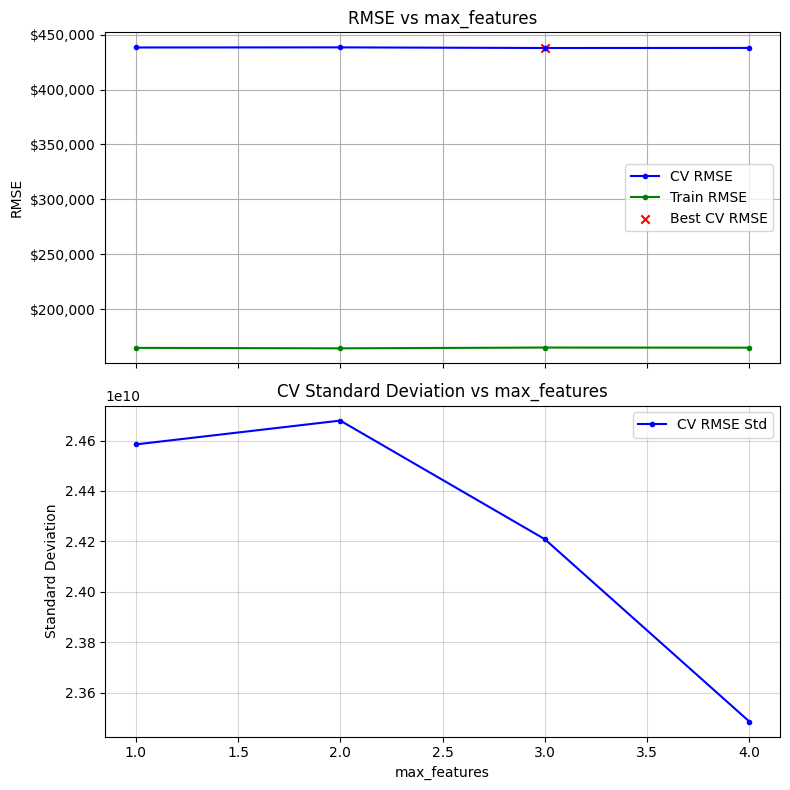

Execution Time: 00:04:09

Parameter max_features = 3 RMSE = $437,879.59

{'n_estimators': 500, 'max_features': 3, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(191738539059.75922)}



Sweeping max_depth: 100%|█████████████████████████| 7/7 [06:00<00:00, 51.44s/it]


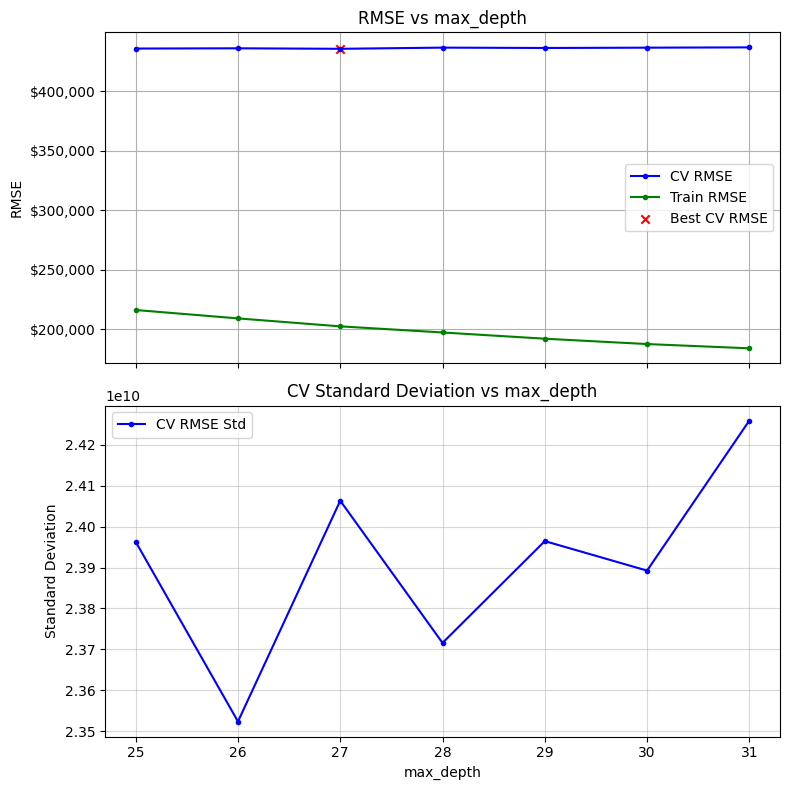

Execution Time: 00:06:00

Parameter max_depth = 27 RMSE = $435,652.10

{'n_estimators': 500, 'max_features': 3, 'max_depth': 27, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(189792753179.74796)}



Sweeping bootstrap: 100%|█████████████████████████| 1/1 [01:13<00:00, 73.43s/it]


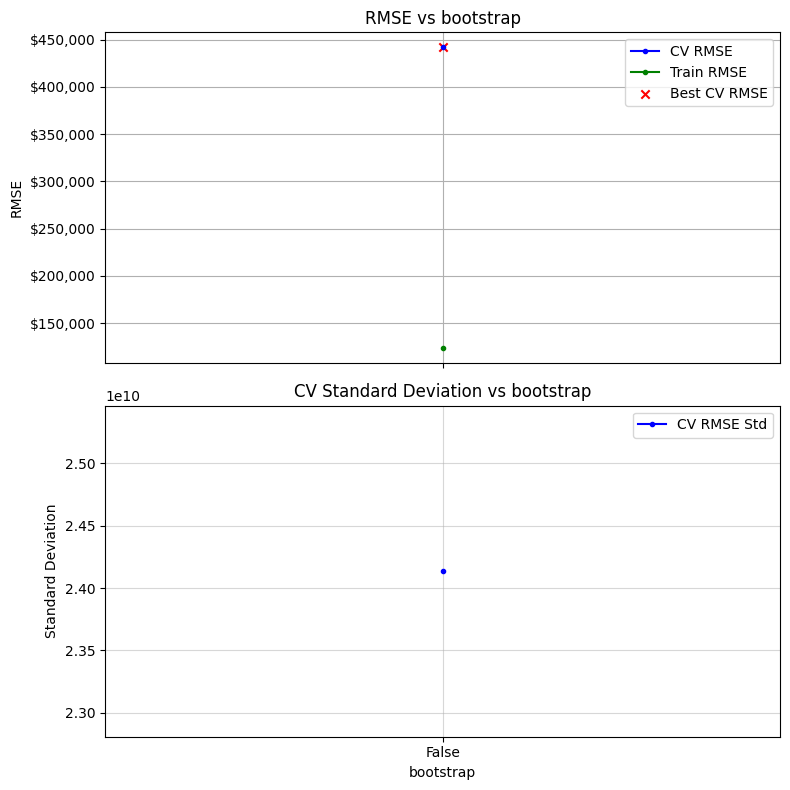

Execution Time: 00:01:13

Parameter bootstrap = False RMSE = $441,851.30

{'n_estimators': 500, 'max_features': 3, 'max_depth': 27, 'bootstrap': False, 'random_state': 42, 'MSE_found': np.float64(195232573945.87503)}



,n_estimators,max_features,max_depth,bootstrap,random_state,MSE_found
0,500,3,27,False,42,1.952326e+11


In [129]:
Params_RF = Default_Parameters_Random_Forests.copy()
Params_RF_List = []

parameters_and_ranges = [('n_estimators', range(150,501,50)),
                         ('max_features', range(1,5,1)),
                         ('max_depth', range(25,32,1)),
                         ('bootstrap', [False])
                        ]

for (param, parameter_list) in parameters_and_ranges:
    Params_RF = sweep_parameter(RandomForestRegressor,
                                Params_RF,
                                param,
                                parameter_list,
                                n_jobs = -1,
                                n_repeats = 2              # want to end at 10
                               )
    print(f"\nParameter {param} = {Params_RF[param]} RMSE = ${Params_RF['MSE_found']**0.5:,.2f}\n")
    print(Params_RF)
    print()

Params_RF_List.append(Params_RF)

pd.DataFrame(Params_RF_List)

Sweeping n_estimators: 100%|█████████████████████| 5/5 [42:18<00:00, 507.65s/it]


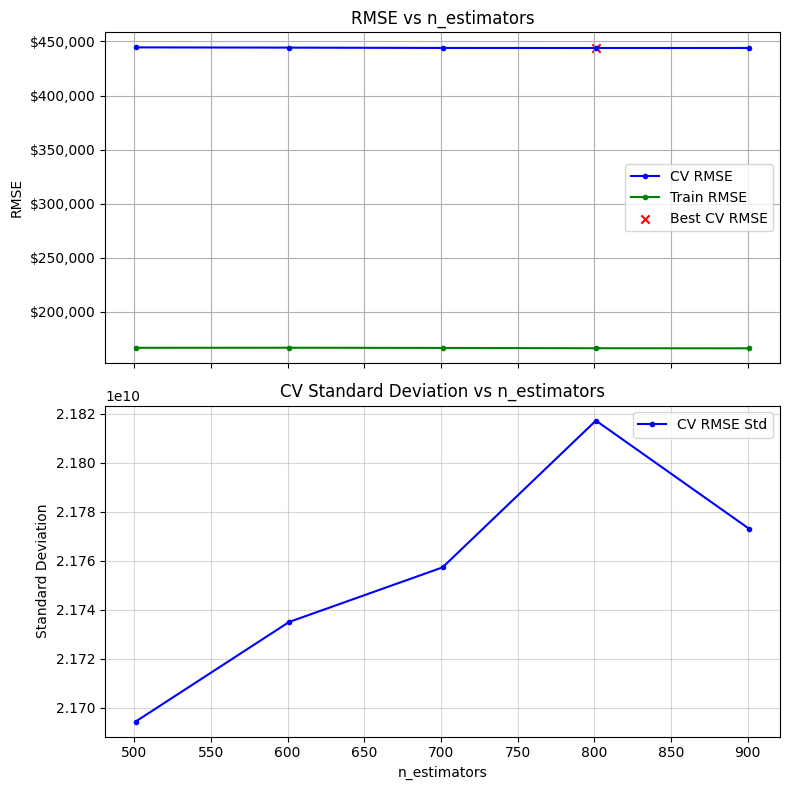

Execution Time: 00:42:18

Parameter n_estimators = 801 RMSE = $443,910.49

{'n_estimators': 801, 'max_features': None, 'max_depth': None, 'bootstrap': True, 'random_state': 42, 'MSE_found': np.float64(197056527067.8062)}



,n_estimators,max_features,max_depth,bootstrap,random_state,MSE_found
0,801,None,None,True,42,1.970565e+11


In [130]:
Params_RF = Default_Parameters_Random_Forests.copy()
Params_RF_List = []

parameters_and_ranges = [('n_estimators', range(500,1000,100)),
                         #('max_features', range(1,5,1)),
                         #('max_depth', range(25,32,1)),
                         #('bootstrap', [False])
                        ]

for (param, parameter_list) in parameters_and_ranges:
    Params_RF = sweep_parameter(RandomForestRegressor,
                                Params_RF,
                                param,
                                parameter_list,
                                n_jobs = -1,
                                n_repeats = 2              # want to end at 10
                               )
    print(f"\nParameter {param} = {Params_RF[param]} RMSE = ${Params_RF['MSE_found']**0.5:,.2f}\n")
    print(Params_RF)
    print()

Params_RF_List.append(Params_RF)

pd.DataFrame(Params_RF_List)

In [132]:
# Your code here -- Add as many code cells as necessary
start = time.time()

# Define parameter grid correctly using dictionary syntax
param_grid = {
    'n_estimators': range(780, 820, 5),  
    'max_features': range(2,4,1),
    'max_depth': range(25, 28, 1),  
    'bootstrap': [False]  # Fixed value
}
                        
# Initialize BaggingRegressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=random_forest_regressor,
    param_grid=param_grid,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42),  # Corrected cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract results
results = grid_search.cv_results_

# Sort results by best mean test score (higher is better since we use neg-MSE)
sorted_indices = np.argsort(results['mean_test_score'])[::-1]

# Print top 10 results
print("Top 10 Results:")
for rank, idx in enumerate(sorted_indices[:10], start=1):
    print(f"Rank {rank}: Params={results['params'][idx]}, RMSE={(-results['mean_test_score'][idx])**0.5:.4f}")

# Print best parameters
print("\nBest Parameters:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_)**0.5)

# Execution time
end = time.time()
print("\nExecution Time:", time.strftime("%H:%M:%S", time.gmtime(end - start)))

Fitting 50 folds for each of 48 candidates, totalling 2400 fits


/Users/ez873/jupyter_env/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Top 10 Results:
Rank 1: Params={'bootstrap': False, 'max_depth': 25, 'max_features': 2, 'n_estimators': 815}, RMSE=440813.9116
Rank 2: Params={'bootstrap': False, 'max_depth': 25, 'max_features': 2, 'n_estimators': 810}, RMSE=440827.5658
Rank 3: Params={'bootstrap': False, 'max_depth': 25, 'max_features': 2, 'n_estimators': 805}, RMSE=440836.0919
Rank 4: Params={'bootstrap': False, 'max_depth': 25, 'max_features': 2, 'n_estimators': 800}, RMSE=440836.7934
Rank 5: Params={'bootstrap': False, 'max_depth': 25, 'max_features': 2, 'n_estimators': 795}, RMSE=440840.5045
Rank 6: Params={'bootstrap': False, 'max_depth': 25, 'max_features': 2, 'n_estimators': 790}, RMSE=440852.2421
Rank 7: Params={'bootstrap': False, 'max_depth': 25, 'max_features': 2, 'n_estimators': 785}, RMSE=440862.2957
Rank 8: Params={'bootstrap': False, 'max_depth': 25, 'max_features': 2, 'n_estimators': 780}, RMSE=440862.5988
Rank 9: Params={'bootstrap': False, 'max_depth': 26, 'max_features': 2, 'n_estimators': 810}, RM

In [136]:
model = RandomForestRegressor
run_model(model, X_train, y_train, n_estimators=815, max_features=2,max_depth=25,bootstrap=False, random_state=42)

/Users/ez873/jupyter_env/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


(np.float64(194316904680.2606),
 np.float64(21243709279.21633),
 30692895373.878258)

In [126]:
Default_Parameters_GradientBoosting = {
    'learning_rate'           : 0.1,             # Shrinks the contribution of each tree. Affects the speed of learning and overfitting.
    'n_estimators'            : 100,             # The number of boosting stages to be run. More estimators can improve performance but increase training time.
    'max_depth'               : 3,               # Maximum depth of individual trees. Controls model complexity.
    'max_features'            : None,            # Number of features to consider when looking for best split. Can help reduce overfitting.
    'random_state'            : 42,              # Controls randomness of boosting. Useful for reproducibility.
    'MSE_found'               : float('inf')     # NOT a parameter, but will record the MSE found for the current parameter choices
}


Sweeping learning_rate: 100%|███████████████████| 10/10 [02:37<00:00, 15.74s/it]


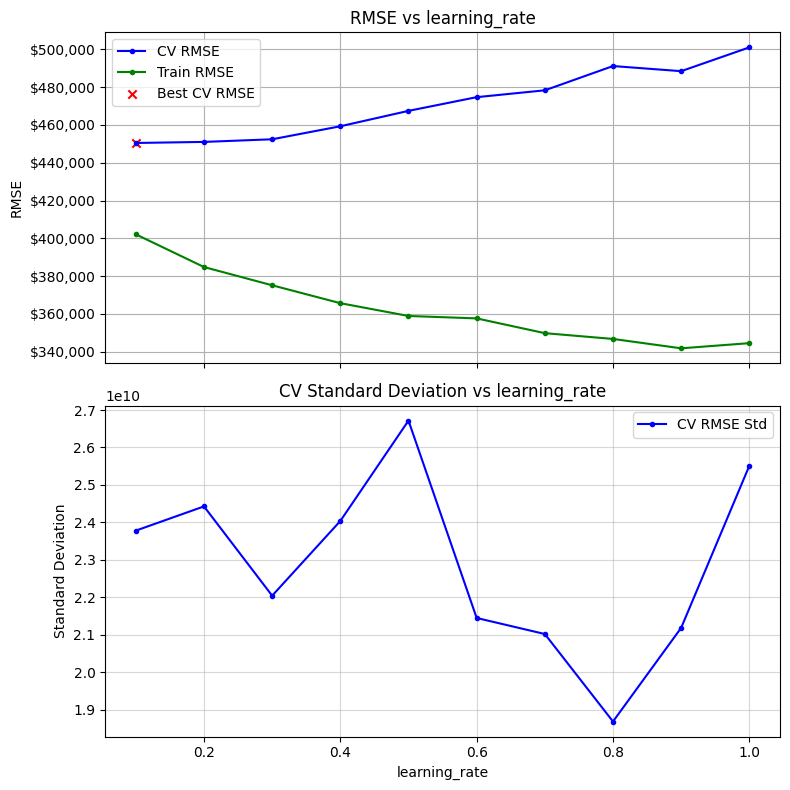

Execution Time: 00:02:37

Parameter learning_rate = 0.1 RMSE = $450,437.92

{'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 3, 'max_features': None, 'random_state': 42, 'MSE_found': np.float64(202894321165.00943)}



Sweeping n_estimators: 100%|████████████████████| 10/10 [06:06<00:00, 36.65s/it]


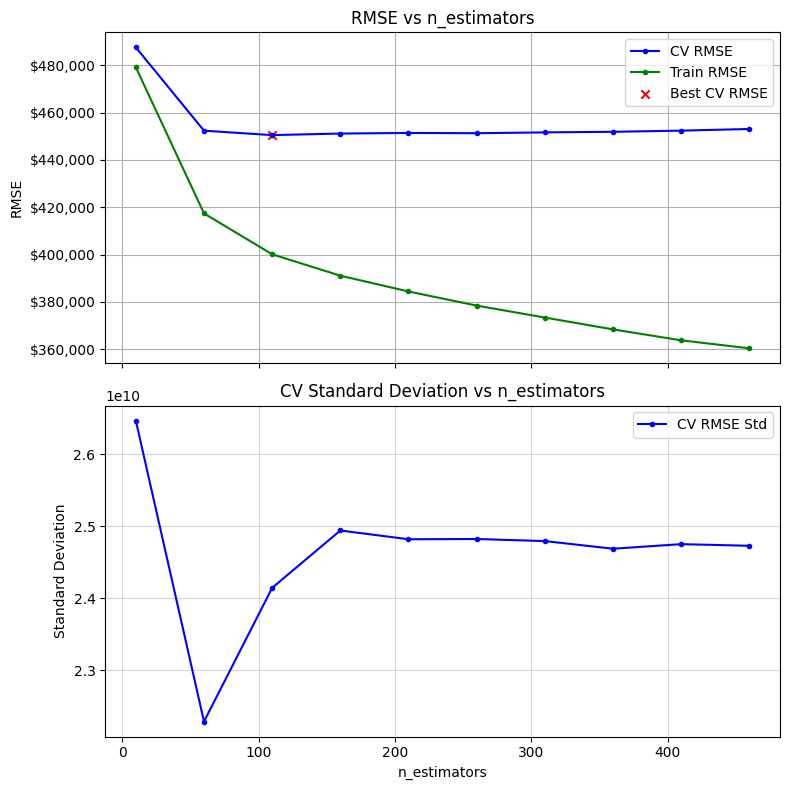

Execution Time: 00:06:06

Parameter n_estimators = 110 RMSE = $450,493.07

{'learning_rate': 0.1, 'n_estimators': 110, 'max_depth': 3, 'max_features': None, 'random_state': 42, 'MSE_found': np.float64(202944007043.33014)}



Sweeping max_depth: 100%|█████████████████████████| 8/8 [11:27<00:00, 85.99s/it]


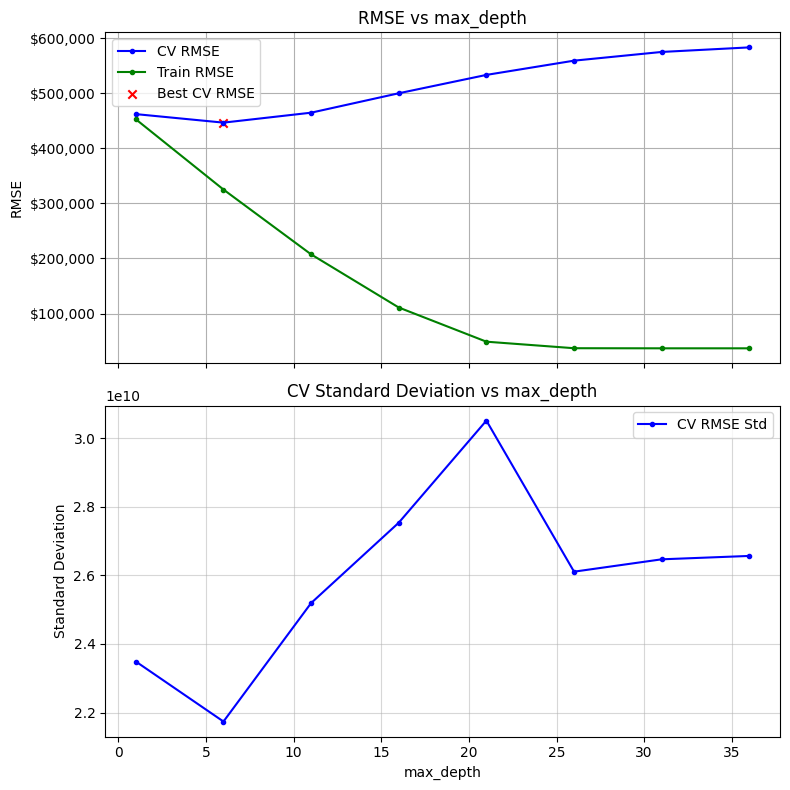

Execution Time: 00:11:28

Parameter max_depth = 6 RMSE = $446,615.98

{'learning_rate': 0.1, 'n_estimators': 110, 'max_depth': 6, 'max_features': None, 'random_state': 42, 'MSE_found': np.float64(199465831275.03265)}



Sweeping max_features: 100%|██████████████████████| 8/8 [02:13<00:00, 16.69s/it]


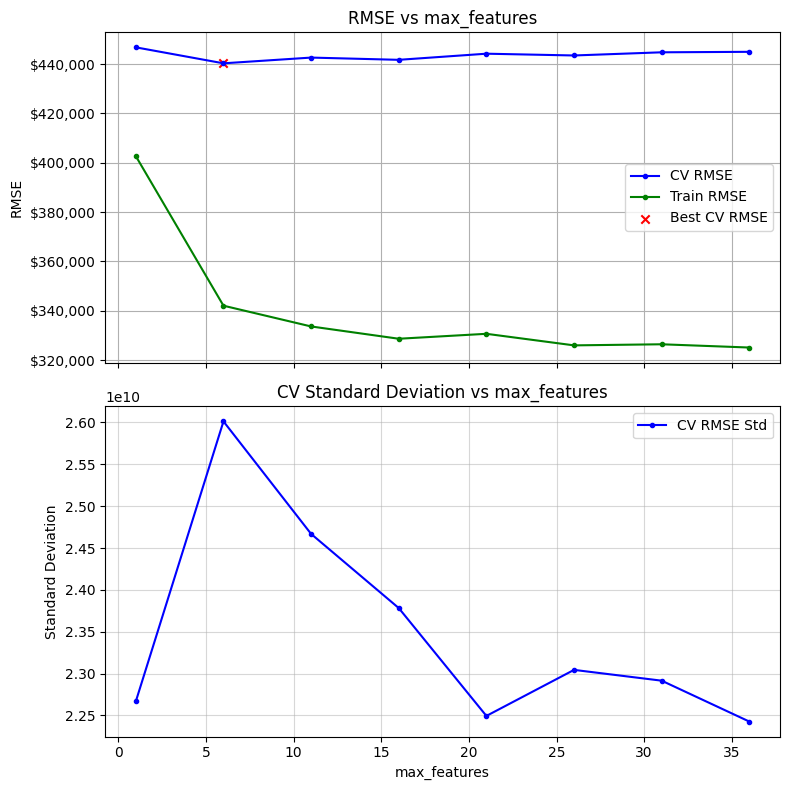

Execution Time: 00:02:13

Parameter max_features = 6 RMSE = $440,293.15

{'learning_rate': 0.1, 'n_estimators': 110, 'max_depth': 6, 'max_features': 6, 'random_state': 42, 'MSE_found': np.float64(193858054841.6773)}



""


In [127]:
# Your code here -- Add as many code cells as necessary
Params_GB = Default_Parameters_GradientBoosting.copy()
Params_GB_List = []

parameters_and_ranges = [('learning_rate', np.linspace(0.1,1.0,10).tolist()),
                         ('n_estimators', range(10,501,50)),
                         ('max_depth', range(1, 41, 5)),
                         ('max_features', range(1,40,5))
                        ]

for (param, parameter_list) in parameters_and_ranges:
    Params_GB = sweep_parameter(GradientBoostingRegressor,
                                Params_GB,
                                param,
                                parameter_list,
                                n_jobs = -1,
                                n_repeats = 2              # want to end at 10
                               )
    print(f"\nParameter {param} = {Params_GB[param]} RMSE = ${Params_GB['MSE_found']**0.5:,.2f}\n")
    print(Params_GB)
    print()

Params_BT_List.append(Params_GB)

pd.DataFrame(Params_GB_List)


Sweeping learning_rate: 100%|█████████████████████| 4/4 [01:03<00:00, 15.78s/it]


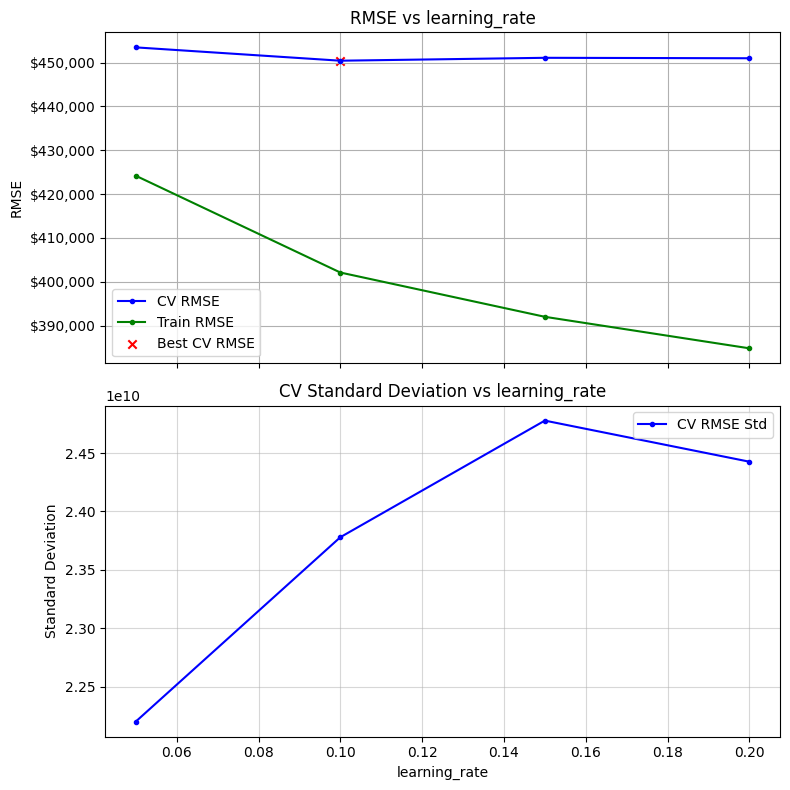

Execution Time: 00:01:03

Parameter learning_rate = 0.1 RMSE = $450,437.92

{'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 3, 'max_features': None, 'random_state': 42, 'MSE_found': np.float64(202894321165.00943)}



Sweeping n_estimators: 100%|████████████████████| 10/10 [02:24<00:00, 14.44s/it]


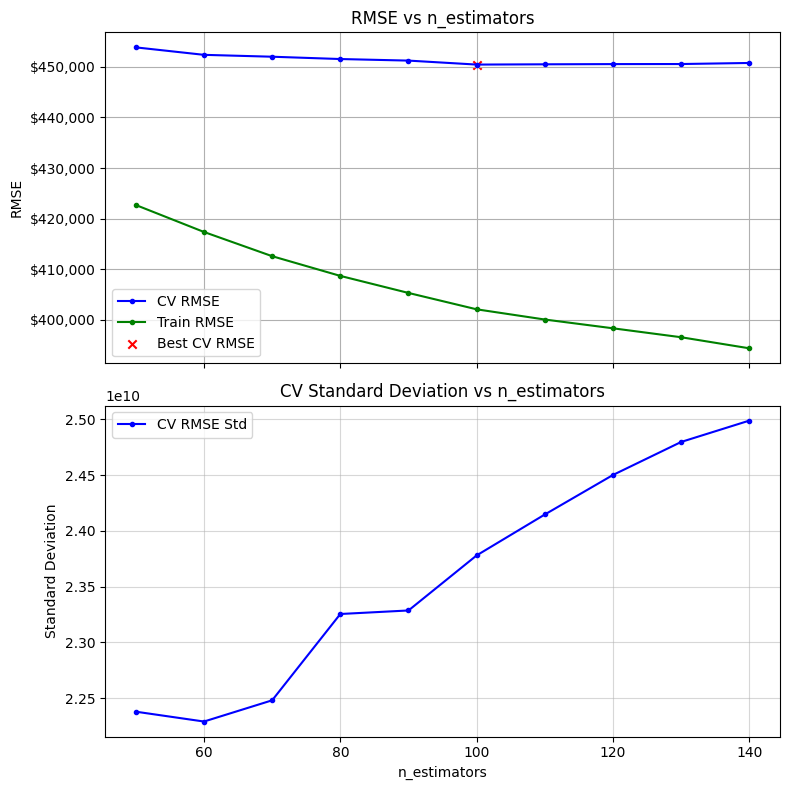

Execution Time: 00:02:24

Parameter n_estimators = 100 RMSE = $450,437.92

{'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 3, 'max_features': None, 'random_state': 42, 'MSE_found': np.float64(202894321165.00943)}



Sweeping max_depth: 100%|█████████████████████████| 4/4 [01:37<00:00, 24.46s/it]


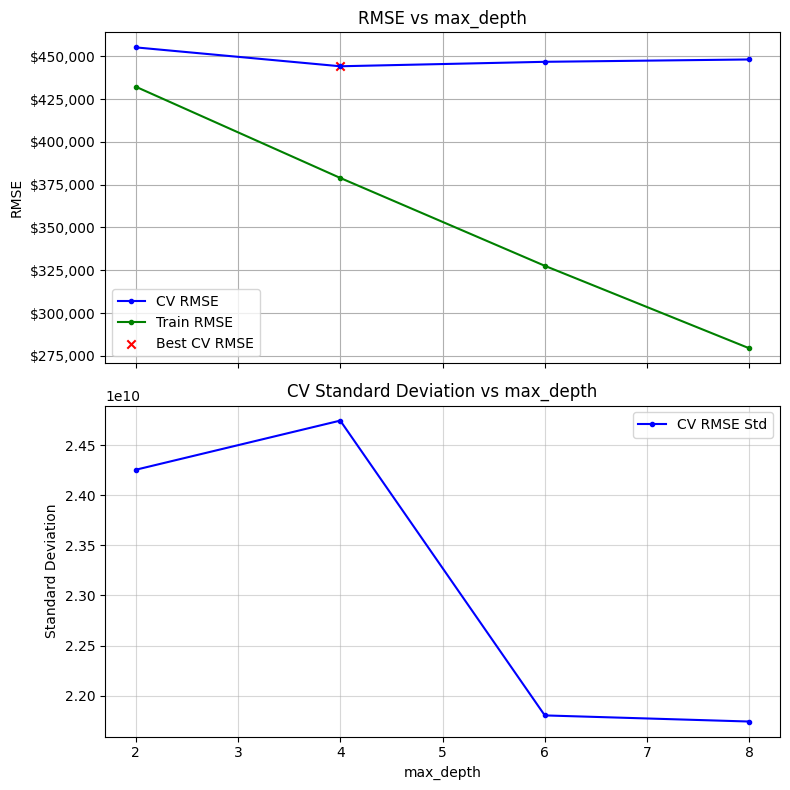

Execution Time: 00:01:37

Parameter max_depth = 4 RMSE = $444,112.30

{'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 4, 'max_features': None, 'random_state': 42, 'MSE_found': np.float64(197235737882.8011)}



Sweeping max_features: 100%|██████████████████████| 5/5 [00:21<00:00,  4.30s/it]


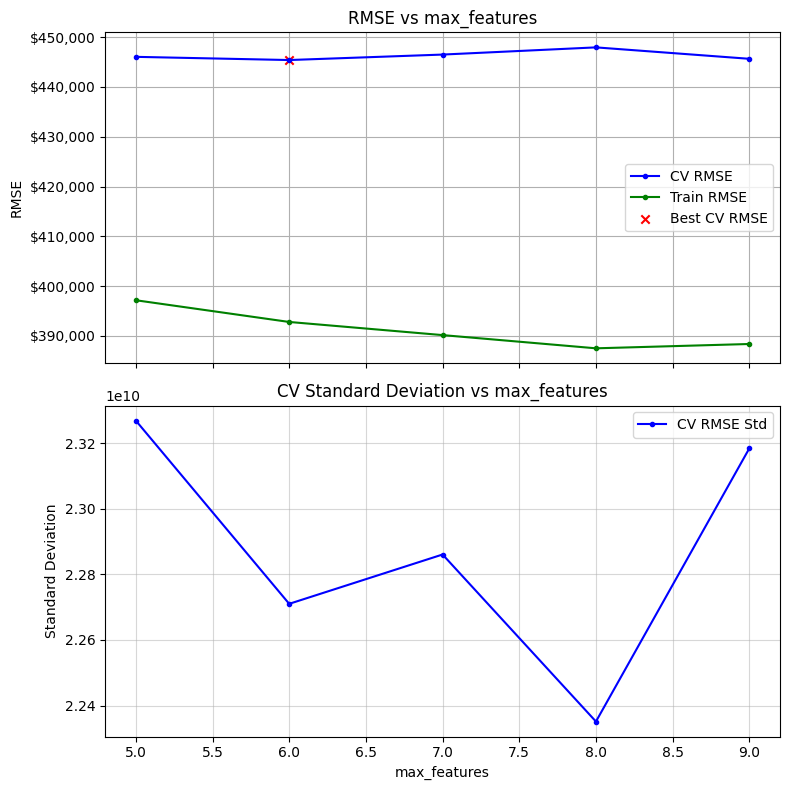

Execution Time: 00:00:21

Parameter max_features = 6 RMSE = $445,403.37

{'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 4, 'max_features': 6, 'random_state': 42, 'MSE_found': np.float64(198384162265.0998)}



""


In [128]:
# Your code here -- Add as many code cells as necessary
Params_GB = Default_Parameters_GradientBoosting.copy()
Params_GB_List = []

parameters_and_ranges = [('learning_rate', np.linspace(0.05,0.2,4).tolist()),
                         ('n_estimators', range(50,150,10)),
                         ('max_depth', range(2, 10, 2)),
                         ('max_features', range(5,10,1))
                        ]

for (param, parameter_list) in parameters_and_ranges:
    Params_GB = sweep_parameter(GradientBoostingRegressor,
                                Params_GB,
                                param,
                                parameter_list,
                                n_jobs = -1,
                                n_repeats = 2              # want to end at 10
                               )
    print(f"\nParameter {param} = {Params_GB[param]} RMSE = ${Params_GB['MSE_found']**0.5:,.2f}\n")
    print(Params_GB)
    print()

Params_BT_List.append(Params_GB)

pd.DataFrame(Params_GB_List)


In [133]:
### READY TO RUN ###
## Your code here -- Add as many code cells as necessary
start = time.time()

# Define parameter grid correctly using dictionary syntax
param_grid = {
    'learning_rate': np.linspace(0.08,0.12,5).tolist(),
    'n_estimators': range(90, 110, 2),  
    'max_depth': range(2, 6, 1),  
    'max_features': range(5,7,1)
}
                        
# Initialize BaggingRegressor
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=gradient_boosting_regressor,
    param_grid=param_grid,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=42),  # Corrected cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract results
results = grid_search.cv_results_

# Sort results by best mean test score (higher is better since we use neg-MSE)
sorted_indices = np.argsort(results['mean_test_score'])[::-1]

# Print top 10 results
print("Top 10 Results:")
for rank, idx in enumerate(sorted_indices[:10], start=1):
    print(f"Rank {rank}: Params={results['params'][idx]}, RMSE={(-results['mean_test_score'][idx])**0.5:.4f}")

# Print best parameters
print("\nBest Parameters:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_)**0.5)

# Execution time
end = time.time()
print("\nExecution Time:", time.strftime("%H:%M:%S", time.gmtime(end - start)))



Fitting 50 folds for each of 400 candidates, totalling 20000 fits
Top 10 Results:
Rank 1: Params={'learning_rate': 0.09, 'max_depth': 5, 'max_features': 5, 'n_estimators': 108}, RMSE=444963.3048
Rank 2: Params={'learning_rate': 0.09, 'max_depth': 5, 'max_features': 5, 'n_estimators': 106}, RMSE=445013.5439
Rank 3: Params={'learning_rate': 0.09, 'max_depth': 5, 'max_features': 5, 'n_estimators': 104}, RMSE=445082.0921
Rank 4: Params={'learning_rate': 0.09, 'max_depth': 5, 'max_features': 5, 'n_estimators': 102}, RMSE=445160.1397
Rank 5: Params={'learning_rate': 0.09, 'max_depth': 5, 'max_features': 5, 'n_estimators': 98}, RMSE=445269.1352
Rank 6: Params={'learning_rate': 0.09, 'max_depth': 5, 'max_features': 5, 'n_estimators': 100}, RMSE=445278.8900
Rank 7: Params={'learning_rate': 0.11, 'max_depth': 5, 'max_features': 5, 'n_estimators': 108}, RMSE=445333.1307
Rank 8: Params={'learning_rate': 0.11, 'max_depth': 5, 'max_features': 5, 'n_estimators': 106}, RMSE=445360.0707
Rank 9: Params=

In [137]:
model = GradientBoostingRegressor
run_model(model, X_train, y_train,learning_rate=0.09, n_estimators=108, max_depth=5, max_features=5,random_state=42)

(np.float64(197992342641.9276),
 np.float64(22884017351.595104),
 141715593332.1476)

In [140]:
# Data for the summary table
data = {
    'Model': [
        'Bagging Regressor', 
        'Random Forest', 
        'Gradient Boosting'
    ],
    'Post-GridSearchCV Mean RMSE ($)': [
       np.sqrt(191524905676.96),
       np.sqrt(194316904680.26),
       np.sqrt(197992342641.92)
    ],
    'Post-GridSearchCV Std RMSE ($)': [
        np.sqrt(20830002768.09),
        np.sqrt(21243709279.22),
        np.sqrt(22884017351.59)
    ]
}

rmse_df = pd.DataFrame(data)

print(rmse_df)


               Model  Post-GridSearchCV Mean RMSE ($)  \
0  Bagging Regressor                    437635.585478   
1      Random Forest                    440813.911623   
2  Gradient Boosting                    444963.304826   

   Post-GridSearchCV Std RMSE ($)  
0                    144326.02942  
1                    145752.21878  
2                    151274.64213  


### Part 4: Discussion [4 pts]

Reflect on your tuning process and final results:

- What was your tuning strategy for each model? Why did you choose those hyperparameters?
- Did you find that certain types of preprocessing or feature engineering worked better with specific models?
- Provide a ranking of your three models and explain your reasoning — not just based on RMSE, but also interpretability, training time, or generalizability.
- Conclude by considering whether this workflow has produced the results you expected. Typically, you would repeat steps 2 - 4 and also reconsider the choices you made in Milestone 1 when cleaning the dataset, until reaching the point of diminishing returns; do you think that would that have helped here?

Similar to the work-flow from previous assignments, we chose to use sweep_parameter to identify parameter ranges of relevant hyperparameters for use with grid search. This allowed us to select hyperparameters that seemed to have the greatest impact on both model performance and stability while omitting those that did not seem to have much impact. It also helped us focus the grid search on ranges that were relevant to speed up the run times. 

Overall, the engineered features led to slight but not massive improvements. Given their rank in feature selection, we think this makes sense. More variables also seemed to work the best, in this case with little impact on runtime given that there are relatively few variables. Were there more in the dataset, it would certainly have been important to cut back on how many were being included for relatively small gains on model performance and potentially large gains in runtime.

Our model ranking is as follows: 1) bagging regressor, 2) random forest regressor, 3) gradient boosting regressor. The RMSEs for the optimized versions of these models differed slightly, but in terms of interpretability the bagging regressor wins out. Averaging of decision trees is not entire transparent, however you can visualize the logic of the decision trees and thus have the same information as the boosting regressor as it gives an average version of the model. This helps with understanding what parameters are contributing most and how, and contributes to this models winning out in terms of understandability. In our case, it also had the lowest RMSE score, making it an easy rank #1. It did have the longest run times, but using the sweep_parameter to pre-select ranges helped get the GridSearch down to a reasonaable length. Random forests come second again for interpretability and RMSE. These too are based on decision trees, but the inclusion of random feature selection makes them far less interpretable. Coincidentally, it also seemed to be second in run times. Last but not least, we have gradient boosting which, once parameters were tuned, ended up with the highest RMSE and the most complicated tree structure to try to glean insight from.  

Most surprising has been the run times for many of these tuning strategies, particularly given the increased prevalence of machine learning models in analysis. From a model optimization perspective, returning to Milestone 1 and changing some of our previous choices could potentially have helped us improve perfomance of the model. The steps conducted there are largely assumption based, and as we know, every assumption has potential consequences. Learning more about the performance of the models and outcomes of feature selection, as well as seeing convergence errors likely due to too many null values in some variables, there are changes we would make if given more time. On the other hand, from a business perspective, this method does not necessarily seem cost effective. Obviously that is not actually the case or they would not be employed so readily. However, employing these strategies, particularly cyclically, seems exceptionally resource intensive (human-power and computationally) for an outcome that can be difficult to interpret. 